# LIBRARY

In [122]:
#Extract The Images from Zip file
! unzip  teeth_dataset.zip -d teeth_dataset

Archive:  teeth_dataset.zip
replace teeth_dataset/teeth_dataset/teeth_dataset/test/caries/wc1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: teeth_dataset/teeth_dataset/teeth_dataset/test/caries/wc1.jpg  
  inflating: teeth_dataset/teeth_dataset/teeth_dataset/test/caries/wc1_0.jpg  
  inflating: teeth_dataset/teeth_dataset/teeth_dataset/test/caries/wc1_1.jpg  
  inflating: teeth_dataset/teeth_dataset/teeth_dataset/test/caries/wc1_10.jpg  
  inflating: teeth_dataset/teeth_dataset/teeth_dataset/test/caries/wc1_11.jpg  
  inflating: teeth_dataset/teeth_dataset/teeth_dataset/test/caries/wc1_12.jpg  
  inflating: teeth_dataset/teeth_dataset/teeth_dataset/test/caries/wc1_13.jpg  
  inflating: teeth_dataset/teeth_dataset/teeth_dataset/test/caries/wc1_14.jpg  
  inflating: teeth_dataset/teeth_dataset/teeth_dataset/test/caries/wc1_15.jpg  
  inflating: teeth_dataset/teeth_dataset/teeth_dataset/test/caries/wc1_16.jpg  
  inflating: teeth_dataset/teeth_dataset/teeth_dataset/test/caries

In [123]:
pip install wandb 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import matplotlib.image as mpimg
import pandas as pd
import wandb
import random
import numpy as np
from wandb.keras import WandbCallback


In [125]:
!pip install visualkeras
import visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# FOLDER TO CSV

In [126]:
#Load The DataSet
BASE_DIR = '/content/teeth_dataset/teeth_dataset/teeth_dataset' #teethdecay
train_folder = os.path.join(BASE_DIR,'train')
test_folder = os.path.join(BASE_DIR,'test')

# label_ = os.listdir(train_folder) #[caries,no-caries]
# TRAIN TO CSV
df_train = pd.DataFrame()
df_image = []
df_label = []

label_num = 0

for i_label in os.listdir(train_folder):
    for j_image in sorted(os.listdir(os.path.join(train_folder,i_label))): #return full images within the folder
        df_image.append(os.path.join('train',i_label,j_image)) # return path_image
        df_label.append(label_num)
    label_num += 1
df_train['images'] = df_image
df_train['target'] = df_label
#caries = 0, no-caries = 1
df_train.to_csv('./train.csv')

# TEST TO CSV
df_test = pd.DataFrame()
df_image = []
df_label = []

label_num = 0

for i_label in os.listdir(test_folder):
    for j_image in sorted(os.listdir(os.path.join(test_folder,i_label))): #return full images within the folder
        df_image.append(os.path.join('test',i_label,j_image))
        df_label.append(label_num)
    label_num += 1
df_test['images'] = df_image
df_test['target'] = df_label
#caries = 1, no-caries = 0
df_test.to_csv('./test.csv')

In [127]:
df_train.tail(5),df_test.tail(5)

(                      images  target
 1259  train/caries/wc9_5.jpg       1
 1260  train/caries/wc9_6.jpg       1
 1261  train/caries/wc9_7.jpg       1
 1262  train/caries/wc9_8.jpg       1
 1263  train/caries/wc9_9.jpg       1,                     images  target
 289  test/caries/wc8_5.jpg       1
 290  test/caries/wc8_6.jpg       1
 291  test/caries/wc8_7.jpg       1
 292  test/caries/wc8_8.jpg       1
 293  test/caries/wc8_9.jpg       1)

# ENHANCE DATASET Not Used 


In [128]:
# lib
# !pip install -U albumentations

In [129]:
# os.makedirs('teeth_dataset',exist_ok=True)
# os.makedirs('teeth_dataset/train',exist_ok=True)
# os.makedirs('teeth_dataset/test',exist_ok=True)
# os.makedirs('teeth_dataset/train/caries',exist_ok=True)
# os.makedirs('teeth_dataset/train/no-caries',exist_ok=True)
# os.makedirs('teeth_dataset/test/caries',exist_ok=True)
# os.makedirs('teeth_dataset/test/no-caries',exist_ok=True)

In [130]:
# transform = A.Compose([
#     A.VerticalFlip(p=0.5),
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.6),
#      A.OneOf([
#                         A.MotionBlur(blur_limit=3),
#                         A.MedianBlur(blur_limit=3),
#                         A.GaussianBlur(blur_limit=(1,3)),
#                         A.GaussNoise(var_limit=(5.0, 15.0)),
#                     ], p=0.7),
#     A.OneOf([
#                         A.OpticalDistortion(distort_limit=1.0),
#                         A.GridDistortion(num_steps=5, distort_limit=1.),
#                         A.ElasticTransform(alpha=3),
#                     ], p=0.7),
#     A.CLAHE(clip_limit=4.0, p=0.7),
#     A.ColorJitter(p=0.7,hue=0.1),
#     A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
#     A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
#     A.CoarseDropout(max_holes=1, max_height=int(50 * 0.375), max_width=int(50 * 0.375), min_holes=1, min_height=None, min_width=None, fill_value=0, mask_fill_value=None, always_apply=False, p=0.7),
    
# ])

In [131]:
# path = os.path.join('../input/toothdecay/teeth_dataset','test','caries')
# path_save = os.path.join('teeth_dataset','test','caries')
# for _image in os.listdir(path):
#     for i in range(20):
#         image = cv2.imread(os.path.join(path,_image))
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         transformed = transform(image=image)['image']
#         cv2.imwrite(path_save+'/'+_image[:-4]+"_"+str(i)+'.jpg' , transformed)

# VISUALIZE DATA

In [132]:
print('Number of train images:',len(df_train))
print('Number of test images:',len(df_test))

Number of train images: 1264
Number of test images: 294


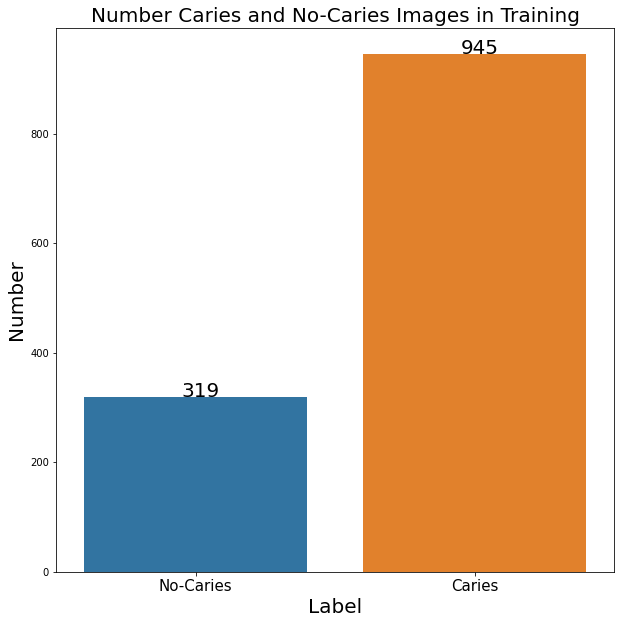

In [133]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = 'target', data = df_train)
ax.set_title('Number Caries and No-Caries Images in Training', size=20)
ax.set_xlabel("Label",fontsize=20)
ax.set_ylabel("Number",fontsize=20)
ax.set_xticklabels(['No-Caries', 'Caries'],fontsize=15)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.2),fontsize=20)

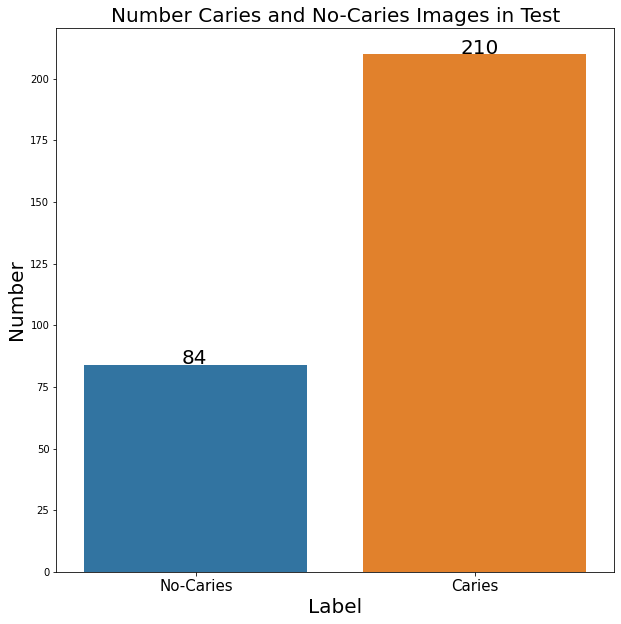

In [134]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = 'target', data = df_test)
ax.set_title('Number Caries and No-Caries Images in Test', size=20)
ax.set_xlabel("Label",fontsize=20)
ax.set_ylabel("Number",fontsize=20)
ax.set_xticklabels(['No-Caries', 'Caries'],fontsize=15)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.2),fontsize=20)

Text(0.5, 1.0, '% Carries and No-Caries In Train')

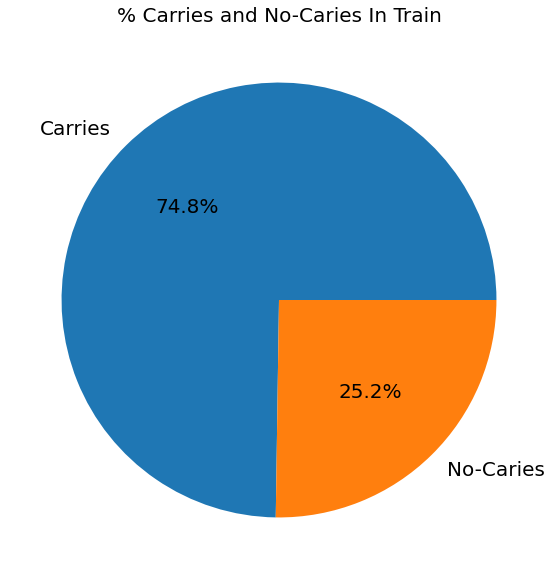

In [135]:
bar, ax = plt.subplots(figsize = (10,10))
bar.patch.set_facecolor('white')
plt.pie(df_train['target'].value_counts(), 
        labels = ['Carries','No-Caries'], 
        autopct="%.1f%%",textprops={'fontsize':20})
plt.title('% Carries and No-Caries In Train', size=20)

Text(0.5, 1.0, '% Carries and No-Caries In Test')

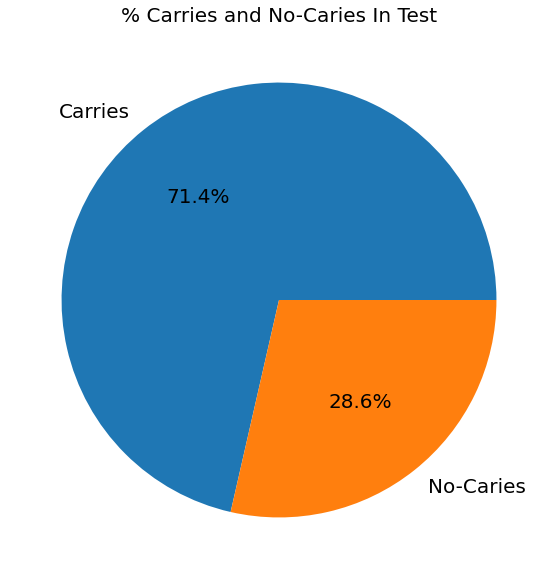

In [136]:
bar, ax = plt.subplots(figsize = (10,10))
bar.patch.set_facecolor('white')
plt.pie(df_test['target'].value_counts(), 
        labels = ['Carries','No-Caries'], 
        autopct="%.1f%%",textprops={'fontsize':20})
plt.title('% Carries and No-Caries In Test', size=20)

In [137]:
#Print Shape of dataset to choose rescale
#for i in os.listdir(os.path.join(BASE_DIR,'train','caries')):
#    im = cv2.imread(os.path.join(BASE_DIR,'train','caries',i)) #H,W,C
#  # print(im.shape)
#for i in os.listdir(os.path.join(BASE_DIR,'train','caries')):
#    im = cv2.imread(os.path.join(BASE_DIR,'train','caries',i)) #H,W,C
#for i in os.listdir(os.path.join(BASE_DIR,'train','caries')):
#    im = cv2.imread(os.path.join(BASE_DIR,'train','caries',i)) #H,W,C
#for i in os.listdir(os.path.join(BASE_DIR,'train','caries')):
#    im = cv2.imread(os.path.join(BASE_DIR,'train','caries',i)) #H,W,C
print('Choose 224x224 rescale is best choice')

Choose 224x224 rescale is best choice


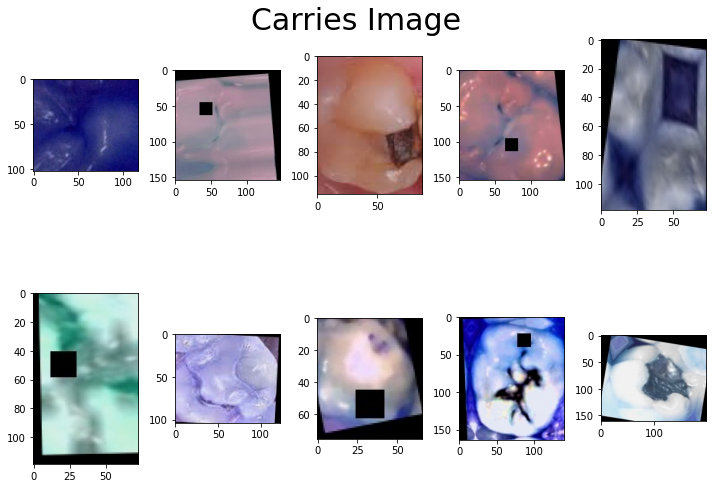

In [138]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
f.suptitle('Carries Image',x=0.5,y=0.8,fontsize=30,verticalalignment='bottom')
k = 0
for i in range(2):
    for j in range(5):
        img = cv2.imread(os.path.join('/content/teeth_dataset/teeth_dataset/teeth_dataset' ,'train','caries',random.choice(os.listdir(os.path.join('/content/teeth_dataset/teeth_dataset/teeth_dataset' ,'train','caries')))))
        im_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
        ax[i,j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        k = k + 1
    plt.tight_layout()

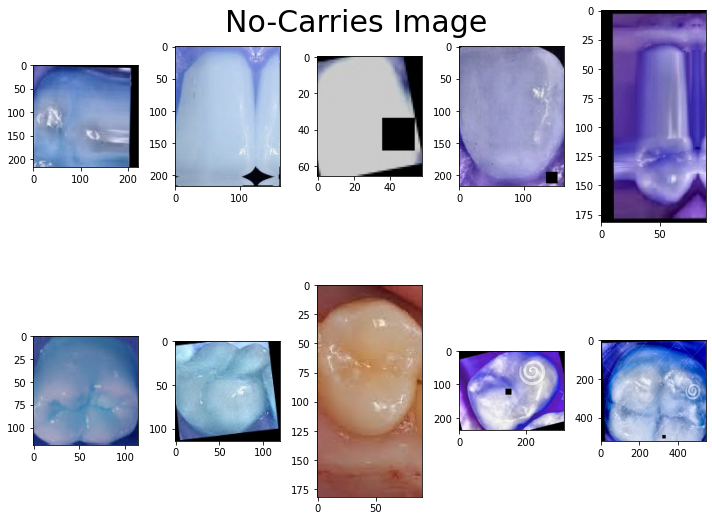

In [139]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
f.suptitle('No-Carries Image',x=0.5,y=0.8,fontsize=30,verticalalignment='bottom')
k = 0
for i in range(2):
    for j in range(5):
        img = cv2.imread(os.path.join('/content/teeth_dataset/teeth_dataset/teeth_dataset' ,'train','no-caries',random.choice(os.listdir(os.path.join('/content/teeth_dataset/teeth_dataset/teeth_dataset' ,'train','no-caries')))))
        im_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
        ax[i,j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        k = k + 1
    plt.tight_layout()

In [140]:
# Set up Generator
train_generator = ImageDataGenerator( 
    rescale = 1.0/255.,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=(0.5, 1.5),
)
val_generator = ImageDataGenerator(rescale=1./255.)

In [141]:
# Set up dataload
train_datagen = train_generator.flow_from_directory(
    train_folder, 
    batch_size=10,
    target_size=(224, 224)
)
val_datagen = val_generator.flow_from_directory(
    test_folder, 
    batch_size=round(len(df_test)/2), # 14/2 = 7
    target_size=(224, 224)
)

Found 1264 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


Found 1264 images belonging to 2 classes.


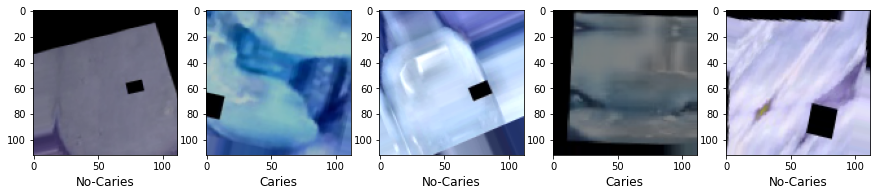

In [142]:
# Images After DATAGENERATOR
# Loads image in from the set image path
pic = train_generator.flow_from_directory(
   '/content/teeth_dataset/teeth_dataset/teeth_dataset/train' , 
    batch_size=1,
    target_size=(112, 112))
f,ax = plt.subplots(1,5)
f.set_figheight(15)
f.set_figwidth(15)
for i in range(5):
    img, label = pic.next()
    ax[i].imshow(img[0])
    ax[i].set_xlabel('Caries' if np.argmax(label) == 0 else 'No-Caries',fontsize=12)

In [143]:
!pip install google.colab
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Train By EfficientNetB2 Model

In [ ]:
# https://keras.io/api/applications/
base_model = tf.keras.applications.EfficientNetB2(input_shape=(224, 224, 3),weights=None,include_top=False,classes=2)

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_1 (Flatten)         (None, 68992)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               35324416  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                

In [ ]:
#tf.keras.utils.plot_model(model, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB", expand_nested = True, dpi = 100) # ,to_file='model.png')

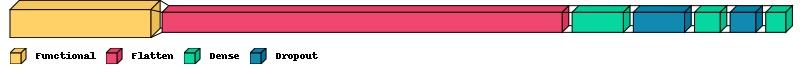

In [ ]:
from PIL import ImageFont
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font,to_file='output.png')  # font is optional!

In [ ]:
# Functone train
# có thể thay thế Adam = RMSprop = SGD
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
path_checkpoint = 'tmp/efficienetb0_checkpoint'
os.makedirs(path_checkpoint,exist_ok=True)

# https://keras.io/api/callbacks/model_checkpoint/
# https://www.tensorflow.org/tensorboard/scalars_and_keras
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc',
                                                mode='max',
                                                 verbose=1)
callback = [Checkpoint, 
             tf.keras.callbacks.EarlyStopping(patience = 5, monitor= "val_acc",verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir = "logs/{}".format('Toothdecay'))]

In [ ]:
history = model.fit(
    train_datagen,
    validation_data=val_datagen,
    epochs=40,
    callbacks=[
        callback
    ])

Epoch 1/40
127/127 [==============================] - ETA: 0s - loss: 0.5087 - accuracy: 0.7666
Epoch 1: saving model to best_model.h5


127/127 [==============================] - 29s 227ms/step - loss: 0.5087 - accuracy: 0.7666 - val_loss: 0.4032 - val_accuracy: 0.8231
Epoch 2/40
127/127 [==============================] - ETA: 0s - loss: 0.5392 - accuracy: 0.7674
Epoch 2: saving model to best_model.h5


127/127 [==============================] - 28s 217ms/step - loss: 0.5392 - accuracy: 0.7674 - val_loss: 0.3867 - val_accuracy: 0.8707
Epoch 3/40
127/127 [==============================] - ETA: 0s - loss: 0.4814 - accuracy: 0.8014
Epoch 3: saving model to best_model.h5


127/127 [==============================] - 28s 220ms/step - loss: 0.4814 - accuracy: 0.8014 - val_loss: 0.4201 - val_accuracy: 0.7517
Epoch 4/40
127/127 [==============================] - ETA: 0s - loss: 0.4936 - accuracy: 0.7991
Epoch 4: saving model to best_model.h5


127/127 [==============================] - 27s 212ms/step - loss: 0.4936 - accuracy: 0.7991 - val_loss: 0.4639 - val_accuracy: 0.7177
Epoch 5/40
127/127 [==============================] - ETA: 0s - loss: 0.4974 - accuracy: 0.8030
Epoch 5: saving model to best_model.h5


127/127 [==============================] - 27s 215ms/step - loss: 0.4974 - accuracy: 0.8030 - val_loss: 0.3414 - val_accuracy: 0.9082
Epoch 6/40
127/127 [==============================] - ETA: 0s - loss: 0.5166 - accuracy: 0.7658
Epoch 6: saving model to best_model.h5


127/127 [==============================] - 27s 211ms/step - loss: 0.5166 - accuracy: 0.7658 - val_loss: 0.4360 - val_accuracy: 0.8061
Epoch 7/40
127/127 [==============================] - ETA: 0s - loss: 0.5140 - accuracy: 0.7816
Epoch 7: saving model to best_model.h5


127/127 [==============================] - 27s 212ms/step - loss: 0.5140 - accuracy: 0.7816 - val_loss: 0.3565 - val_accuracy: 0.8741
Epoch 8/40
127/127 [==============================] - ETA: 0s - loss: 0.5314 - accuracy: 0.7880
Epoch 8: saving model to best_model.h5


127/127 [==============================] - 30s 232ms/step - loss: 0.5314 - accuracy: 0.7880 - val_loss: 0.3420 - val_accuracy: 0.8912
Epoch 9/40
127/127 [==============================] - ETA: 0s - loss: 0.4825 - accuracy: 0.8054
Epoch 9: saving model to best_model.h5


127/127 [==============================] - 27s 211ms/step - loss: 0.4825 - accuracy: 0.8054 - val_loss: 0.3182 - val_accuracy: 0.9218
Epoch 10/40
127/127 [==============================] - ETA: 0s - loss: 0.4650 - accuracy: 0.8109
Epoch 10: saving model to best_model.h5


127/127 [==============================] - 27s 211ms/step - loss: 0.4650 - accuracy: 0.8109 - val_loss: 0.5005 - val_accuracy: 0.8401
Epoch 11/40
127/127 [==============================] - ETA: 0s - loss: 0.5188 - accuracy: 0.8006
Epoch 11: saving model to best_model.h5


127/127 [==============================] - 27s 213ms/step - loss: 0.5188 - accuracy: 0.8006 - val_loss: 0.3213 - val_accuracy: 0.8810
Epoch 12/40
127/127 [==============================] - ETA: 0s - loss: 0.4859 - accuracy: 0.7951
Epoch 12: saving model to best_model.h5


127/127 [==============================] - 27s 212ms/step - loss: 0.4859 - accuracy: 0.7951 - val_loss: 0.3314 - val_accuracy: 0.8912
Epoch 13/40
127/127 [==============================] - ETA: 0s - loss: 0.4627 - accuracy: 0.7967
Epoch 13: saving model to best_model.h5


127/127 [==============================] - 27s 213ms/step - loss: 0.4627 - accuracy: 0.7967 - val_loss: 0.3317 - val_accuracy: 0.9150
Epoch 14/40
127/127 [==============================] - ETA: 0s - loss: 0.5217 - accuracy: 0.7848
Epoch 14: saving model to best_model.h5


127/127 [==============================] - 27s 211ms/step - loss: 0.5217 - accuracy: 0.7848 - val_loss: 0.4543 - val_accuracy: 0.8061
Epoch 15/40
127/127 [==============================] - ETA: 0s - loss: 0.4759 - accuracy: 0.7919
Epoch 15: saving model to best_model.h5


127/127 [==============================] - 27s 212ms/step - loss: 0.4759 - accuracy: 0.7919 - val_loss: 2.0887 - val_accuracy: 0.9218
Epoch 16/40
127/127 [==============================] - ETA: 0s - loss: 0.4894 - accuracy: 0.7872
Epoch 16: saving model to best_model.h5


127/127 [==============================] - 29s 231ms/step - loss: 0.4894 - accuracy: 0.7872 - val_loss: 0.3747 - val_accuracy: 0.9014
Epoch 17/40
127/127 [==============================] - ETA: 0s - loss: 0.4611 - accuracy: 0.8149
Epoch 17: saving model to best_model.h5


127/127 [==============================] - 27s 213ms/step - loss: 0.4611 - accuracy: 0.8149 - val_loss: 0.3192 - val_accuracy: 0.9116
Epoch 18/40
127/127 [==============================] - ETA: 0s - loss: 0.4475 - accuracy: 0.8172
Epoch 18: saving model to best_model.h5


127/127 [==============================] - 27s 213ms/step - loss: 0.4475 - accuracy: 0.8172 - val_loss: 0.3272 - val_accuracy: 0.8980
Epoch 19/40
127/127 [==============================] - ETA: 0s - loss: 0.4683 - accuracy: 0.8022
Epoch 19: saving model to best_model.h5


127/127 [==============================] - 27s 213ms/step - loss: 0.4683 - accuracy: 0.8022 - val_loss: 0.3585 - val_accuracy: 0.7959
Epoch 20/40
127/127 [==============================] - ETA: 0s - loss: 0.4685 - accuracy: 0.8101
Epoch 20: saving model to best_model.h5


127/127 [==============================] - 27s 212ms/step - loss: 0.4685 - accuracy: 0.8101 - val_loss: 0.3313 - val_accuracy: 0.9150
Epoch 21/40
127/127 [==============================] - ETA: 0s - loss: 0.4545 - accuracy: 0.8101
Epoch 21: saving model to best_model.h5


127/127 [==============================] - 27s 215ms/step - loss: 0.4545 - accuracy: 0.8101 - val_loss: 0.3935 - val_accuracy: 0.8912
Epoch 22/40
127/127 [==============================] - ETA: 0s - loss: 0.4875 - accuracy: 0.7991
Epoch 22: saving model to best_model.h5


127/127 [==============================] - 27s 215ms/step - loss: 0.4875 - accuracy: 0.7991 - val_loss: 0.3847 - val_accuracy: 0.8707
Epoch 23/40
127/127 [==============================] - ETA: 0s - loss: 0.4741 - accuracy: 0.8172
Epoch 23: saving model to best_model.h5


127/127 [==============================] - 27s 213ms/step - loss: 0.4741 - accuracy: 0.8172 - val_loss: 0.3085 - val_accuracy: 0.9286
Epoch 24/40
127/127 [==============================] - ETA: 0s - loss: 0.4655 - accuracy: 0.8117
Epoch 24: saving model to best_model.h5


127/127 [==============================] - 28s 219ms/step - loss: 0.4655 - accuracy: 0.8117 - val_loss: 0.3912 - val_accuracy: 0.8605
Epoch 25/40
127/127 [==============================] - ETA: 0s - loss: 0.4609 - accuracy: 0.8085
Epoch 25: saving model to best_model.h5


127/127 [==============================] - 29s 223ms/step - loss: 0.4609 - accuracy: 0.8085 - val_loss: 0.3738 - val_accuracy: 0.7925
Epoch 26/40
127/127 [==============================] - ETA: 0s - loss: 0.4801 - accuracy: 0.8117
Epoch 26: saving model to best_model.h5


127/127 [==============================] - 27s 214ms/step - loss: 0.4801 - accuracy: 0.8117 - val_loss: 0.3957 - val_accuracy: 0.8776
Epoch 27/40
127/127 [==============================] - ETA: 0s - loss: 0.4786 - accuracy: 0.8101
Epoch 27: saving model to best_model.h5


127/127 [==============================] - 27s 213ms/step - loss: 0.4786 - accuracy: 0.8101 - val_loss: 0.3454 - val_accuracy: 0.8946
Epoch 28/40
127/127 [==============================] - ETA: 0s - loss: 0.4521 - accuracy: 0.8149
Epoch 28: saving model to best_model.h5


127/127 [==============================] - 27s 215ms/step - loss: 0.4521 - accuracy: 0.8149 - val_loss: 0.3178 - val_accuracy: 0.9320
Epoch 29/40
127/127 [==============================] - ETA: 0s - loss: 0.4370 - accuracy: 0.8283
Epoch 29: saving model to best_model.h5


127/127 [==============================] - 28s 216ms/step - loss: 0.4370 - accuracy: 0.8283 - val_loss: 0.4666 - val_accuracy: 0.8707
Epoch 30/40
127/127 [==============================] - ETA: 0s - loss: 0.5196 - accuracy: 0.8125
Epoch 30: saving model to best_model.h5


127/127 [==============================] - 27s 213ms/step - loss: 0.5196 - accuracy: 0.8125 - val_loss: 0.3587 - val_accuracy: 0.9048
Epoch 31/40
127/127 [==============================] - ETA: 0s - loss: 0.4695 - accuracy: 0.8054
Epoch 31: saving model to best_model.h5


127/127 [==============================] - 28s 216ms/step - loss: 0.4695 - accuracy: 0.8054 - val_loss: 0.3754 - val_accuracy: 0.9354
Epoch 32/40
127/127 [==============================] - ETA: 0s - loss: 0.4775 - accuracy: 0.8109
Epoch 32: saving model to best_model.h5


127/127 [==============================] - 27s 211ms/step - loss: 0.4775 - accuracy: 0.8109 - val_loss: 0.3649 - val_accuracy: 0.9252
Epoch 33/40
127/127 [==============================] - ETA: 0s - loss: 0.4794 - accuracy: 0.8093
Epoch 33: saving model to best_model.h5


127/127 [==============================] - 30s 235ms/step - loss: 0.4794 - accuracy: 0.8093 - val_loss: 0.6269 - val_accuracy: 0.8776
Epoch 34/40
127/127 [==============================] - ETA: 0s - loss: 0.4699 - accuracy: 0.8133
Epoch 34: saving model to best_model.h5


127/127 [==============================] - 27s 213ms/step - loss: 0.4699 - accuracy: 0.8133 - val_loss: 0.4062 - val_accuracy: 0.8741
Epoch 35/40
127/127 [==============================] - ETA: 0s - loss: 0.4445 - accuracy: 0.8204
Epoch 35: saving model to best_model.h5


127/127 [==============================] - 28s 216ms/step - loss: 0.4445 - accuracy: 0.8204 - val_loss: 0.3992 - val_accuracy: 0.8844
Epoch 36/40
127/127 [==============================] - ETA: 0s - loss: 0.4490 - accuracy: 0.8006
Epoch 36: saving model to best_model.h5


127/127 [==============================] - 27s 213ms/step - loss: 0.4490 - accuracy: 0.8006 - val_loss: 0.4660 - val_accuracy: 0.8878
Epoch 37/40
127/127 [==============================] - ETA: 0s - loss: 0.4783 - accuracy: 0.8204
Epoch 37: saving model to best_model.h5


127/127 [==============================] - 27s 212ms/step - loss: 0.4783 - accuracy: 0.8204 - val_loss: 0.3726 - val_accuracy: 0.9116
Epoch 38/40
127/127 [==============================] - ETA: 0s - loss: 0.3576 - accuracy: 0.8434
Epoch 38: saving model to best_model.h5


127/127 [==============================] - 27s 214ms/step - loss: 0.3576 - accuracy: 0.8434 - val_loss: 0.3675 - val_accuracy: 0.9048
Epoch 39/40
127/127 [==============================] - ETA: 0s - loss: 0.4631 - accuracy: 0.8157
Epoch 39: saving model to best_model.h5


127/127 [==============================] - 27s 215ms/step - loss: 0.4631 - accuracy: 0.8157 - val_loss: 0.3189 - val_accuracy: 0.9082
Epoch 40/40
127/127 [==============================] - ETA: 0s - loss: 0.4090 - accuracy: 0.8267
Epoch 40: saving model to best_model.h5


127/127 [==============================] - 30s 235ms/step - loss: 0.4090 - accuracy: 0.8267 - val_loss: 0.4510 - val_accuracy: 0.8878


# Plot Accuracy and Loss EfficientNetB2

In [ ]:
# Load the TensorBoard notebook extension.
# %load_ext tensorboard
# %tensorboard --logdir logs/Toothdecay

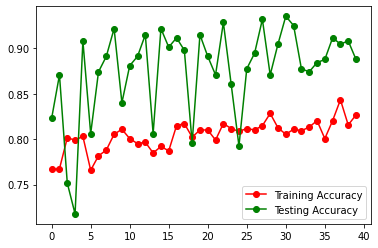

In [ ]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

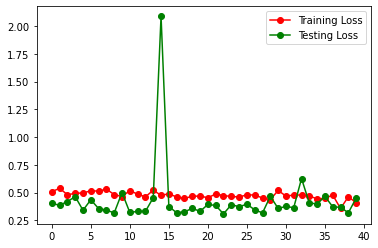

In [ ]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [ ]:
# https://keras.io/api/preprocessing/image/
val_generator = ImageDataGenerator(rescale=1./255.)
val_datagen = val_generator.flow_from_directory(
    test_folder, 
    batch_size=round(len(df_test)/2), # 14/2 = 7
    target_size=(224, 224),
    shuffle=False
)
# for i in range(5):
#     img, label = pic.next()
#     ax[i].imshow(img[0])
#     ax[i].set_xlabel('Caries' if np.argmax(label) == 0 else 'No-Caries',fontsize=12)

Found 294 images belonging to 2 classes.


In [ ]:
Y_true = val_datagen.classes
Y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
Y_pred  = model.predict(val_datagen).round()
Y_pred[0:5]

2/2 [==============================] - 1s 382ms/step


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
Y_true_onehot = tf.keras.utils.to_categorical(Y_true)
Y_true_onehot[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
target_names = ['caries','no-caries']
print(classification_report(Y_true_onehot , Y_pred, target_names = target_names))

              precision    recall  f1-score   support

      caries       0.87      0.99      0.93       210
   no-caries       0.96      0.63      0.76        84

   micro avg       0.89      0.89      0.89       294
   macro avg       0.92      0.81      0.84       294
weighted avg       0.90      0.89      0.88       294
 samples avg       0.89      0.89      0.89       294



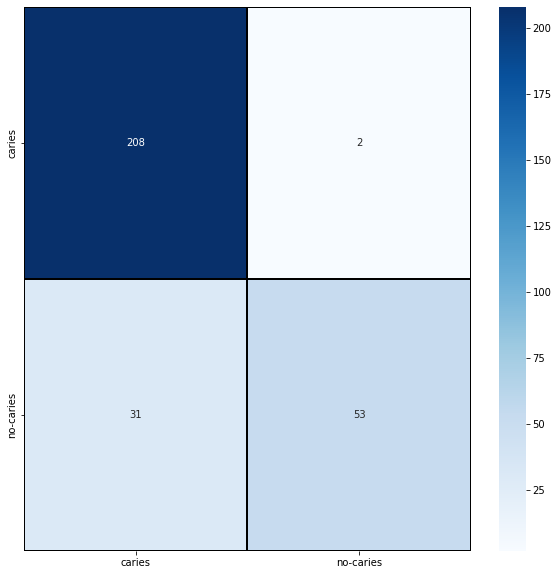

In [ ]:
cm = confusion_matrix(Y_true_onehot.argmax(axis = 1) , Y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = ['caries','no-caries'] , columns = ['caries','no-caries'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,roc_curve, auc
print("roc_auc_score:",roc_auc_score(Y_true_onehot,Y_pred))

roc_auc_score: 0.8107142857142857


In [ ]:
precision_score(Y_true_onehot,Y_pred,average=None)

array([0.87029289, 0.96363636])

In [ ]:
recall_score(Y_true_onehot,Y_pred,average=None)

array([0.99047619, 0.63095238])

In [ ]:
f1_score(Y_true_onehot,Y_pred,average=None)

array([0.92650334, 0.76258993])

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_true_onehot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(Y_true_onehot.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

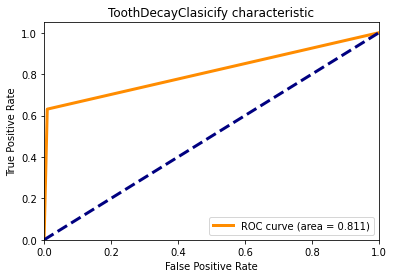

In [ ]:
plt.figure()
lw = 3
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ToothDecayClasicify characteristic')
plt.legend(loc="lower right")
plt.show()

<ipython-input-169-c643d80d3064>:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


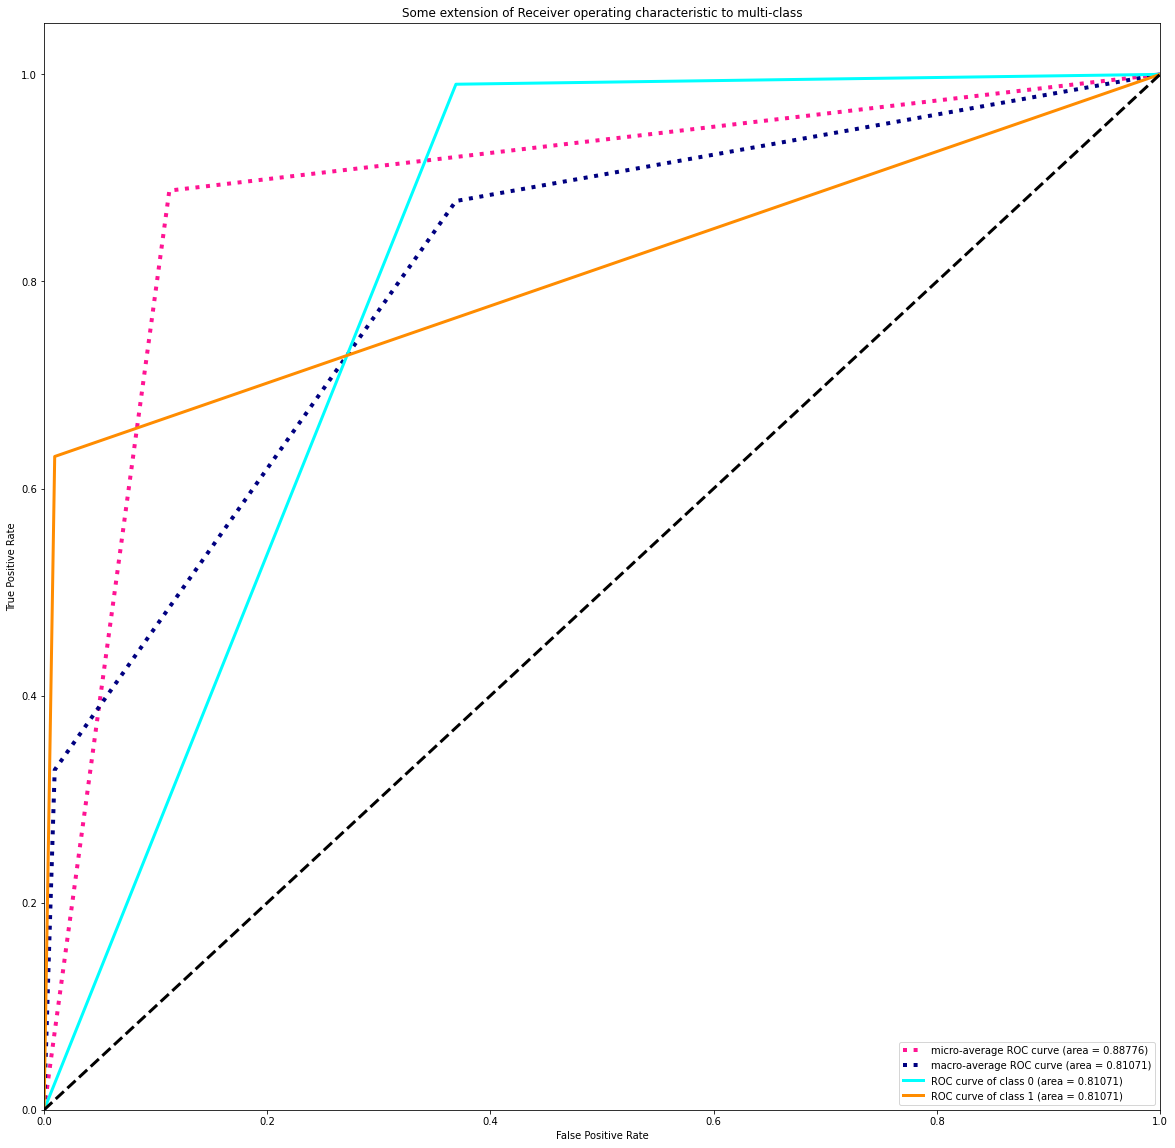

In [ ]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20,20))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.5f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Train By VGG19 Model



In [144]:
# https://keras.io/api/applications/
base_model = tf.keras.applications.VGG19(input_shape=(224, 224, 3),weights=None,include_top=False,classes=2)

In [145]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 5

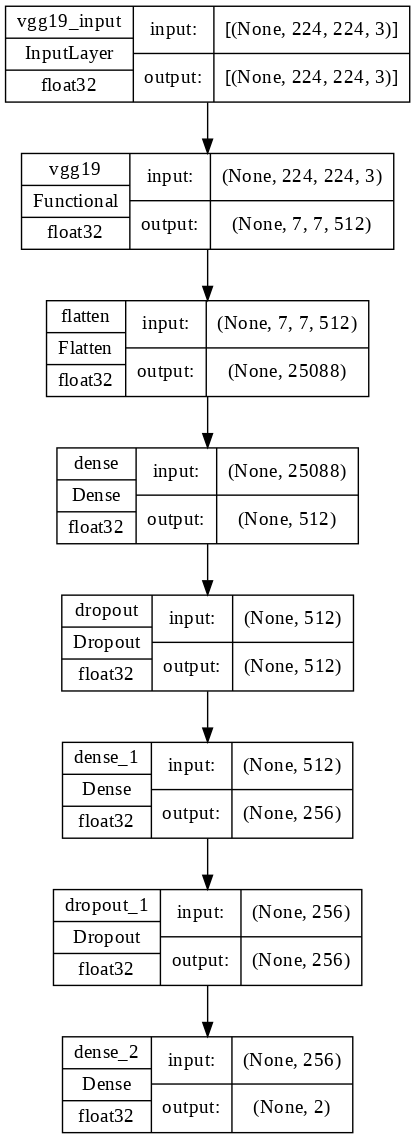

In [146]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB",  dpi = 100 ,to_file='VGG19.png')

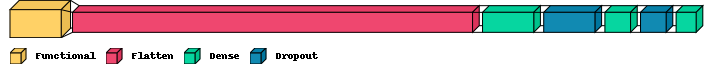

In [147]:
from PIL import ImageFont
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font,to_file='output_VGG19.png')  # font is optional!

In [148]:
# Functone train
# có thể thay thế Adam = RMSprop = SGD
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [149]:
path_checkpoint = 'tmp/VGG19_checkpoint'
os.makedirs(path_checkpoint,exist_ok=True)

# https://keras.io/api/callbacks/model_checkpoint/
# https://www.tensorflow.org/tensorboard/scalars_and_keras
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_VGG19.h5',
                                                  monitor='val_acc',
                                                mode='max',
                                                 verbose=1)
callback = [Checkpoint, 
             tf.keras.callbacks.EarlyStopping(patience = 5, monitor= "val_acc",verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir = "logs/{}".format('Toothdecay'))]

In [150]:
history = model.fit(
    train_datagen,
    validation_data=val_datagen,
    epochs=40,
    callbacks=[
        callback
    ])

Epoch 1/40
127/127 [==============================] - ETA: 0s - loss: 0.6303 - accuracy: 0.7460
Epoch 1: saving model to best_model_VGG19.h5


127/127 [==============================] - 62s 389ms/step - loss: 0.6303 - accuracy: 0.7460 - val_loss: 0.6002 - val_accuracy: 0.7143
Epoch 2/40
127/127 [==============================] - ETA: 0s - loss: 0.5845 - accuracy: 0.7476
Epoch 2: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 223ms/step - loss: 0.5845 - accuracy: 0.7476 - val_loss: 0.6006 - val_accuracy: 0.7143
Epoch 3/40
127/127 [==============================] - ETA: 0s - loss: 0.5719 - accuracy: 0.7476
Epoch 3: saving model to best_model_VGG19.h5


127/127 [==============================] - 32s 255ms/step - loss: 0.5719 - accuracy: 0.7476 - val_loss: 0.6085 - val_accuracy: 0.7143
Epoch 4/40
127/127 [==============================] - ETA: 0s - loss: 0.5790 - accuracy: 0.7476
Epoch 4: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 230ms/step - loss: 0.5790 - accuracy: 0.7476 - val_loss: 0.6040 - val_accuracy: 0.7143
Epoch 5/40
127/127 [==============================] - ETA: 0s - loss: 0.5809 - accuracy: 0.7476
Epoch 5: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 230ms/step - loss: 0.5809 - accuracy: 0.7476 - val_loss: 0.6023 - val_accuracy: 0.7143
Epoch 6/40
127/127 [==============================] - ETA: 0s - loss: 0.5778 - accuracy: 0.7476
Epoch 6: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.5778 - accuracy: 0.7476 - val_loss: 0.6023 - val_accuracy: 0.7143
Epoch 7/40
127/127 [==============================] - ETA: 0s - loss: 0.5711 - accuracy: 0.7476
Epoch 7: saving model to best_model_VGG19.h5


127/127 [==============================] - 30s 234ms/step - loss: 0.5711 - accuracy: 0.7476 - val_loss: 0.6051 - val_accuracy: 0.7143
Epoch 8/40
127/127 [==============================] - ETA: 0s - loss: 0.5876 - accuracy: 0.7476
Epoch 8: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.5876 - accuracy: 0.7476 - val_loss: 0.5952 - val_accuracy: 0.7143
Epoch 9/40
127/127 [==============================] - ETA: 0s - loss: 0.5848 - accuracy: 0.7476
Epoch 9: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 226ms/step - loss: 0.5848 - accuracy: 0.7476 - val_loss: 0.5966 - val_accuracy: 0.7143
Epoch 10/40
127/127 [==============================] - ETA: 0s - loss: 0.5699 - accuracy: 0.7476
Epoch 10: saving model to best_model_VGG19.h5


127/127 [==============================] - 30s 232ms/step - loss: 0.5699 - accuracy: 0.7476 - val_loss: 0.4794 - val_accuracy: 0.7143
Epoch 11/40
127/127 [==============================] - ETA: 0s - loss: 0.5336 - accuracy: 0.7500
Epoch 11: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.5336 - accuracy: 0.7500 - val_loss: 0.3978 - val_accuracy: 0.7211
Epoch 12/40
127/127 [==============================] - ETA: 0s - loss: 0.5045 - accuracy: 0.7737
Epoch 12: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 230ms/step - loss: 0.5045 - accuracy: 0.7737 - val_loss: 0.5064 - val_accuracy: 0.7143
Epoch 13/40
127/127 [==============================] - ETA: 0s - loss: 0.4680 - accuracy: 0.7903
Epoch 13: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 230ms/step - loss: 0.4680 - accuracy: 0.7903 - val_loss: 0.5739 - val_accuracy: 0.7143
Epoch 14/40
127/127 [==============================] - ETA: 0s - loss: 0.4368 - accuracy: 0.8172
Epoch 14: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.4368 - accuracy: 0.8172 - val_loss: 0.3979 - val_accuracy: 0.8946
Epoch 15/40
127/127 [==============================] - ETA: 0s - loss: 0.4258 - accuracy: 0.8180
Epoch 15: saving model to best_model_VGG19.h5


127/127 [==============================] - 30s 233ms/step - loss: 0.4258 - accuracy: 0.8180 - val_loss: 0.2733 - val_accuracy: 0.9354
Epoch 16/40
127/127 [==============================] - ETA: 0s - loss: 0.4064 - accuracy: 0.8410
Epoch 16: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.4064 - accuracy: 0.8410 - val_loss: 0.4553 - val_accuracy: 0.7925
Epoch 17/40
127/127 [==============================] - ETA: 0s - loss: 0.4103 - accuracy: 0.8228
Epoch 17: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 230ms/step - loss: 0.4103 - accuracy: 0.8228 - val_loss: 0.3571 - val_accuracy: 0.8469
Epoch 18/40
127/127 [==============================] - ETA: 0s - loss: 0.4021 - accuracy: 0.8370
Epoch 18: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.4021 - accuracy: 0.8370 - val_loss: 0.3533 - val_accuracy: 0.8776
Epoch 19/40
127/127 [==============================] - ETA: 0s - loss: 0.4024 - accuracy: 0.8275
Epoch 19: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.4024 - accuracy: 0.8275 - val_loss: 0.2942 - val_accuracy: 0.9184
Epoch 20/40
127/127 [==============================] - ETA: 0s - loss: 0.3825 - accuracy: 0.8378
Epoch 20: saving model to best_model_VGG19.h5


127/127 [==============================] - 30s 234ms/step - loss: 0.3825 - accuracy: 0.8378 - val_loss: 0.3230 - val_accuracy: 0.9150
Epoch 21/40
127/127 [==============================] - ETA: 0s - loss: 0.3698 - accuracy: 0.8536
Epoch 21: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 230ms/step - loss: 0.3698 - accuracy: 0.8536 - val_loss: 0.9368 - val_accuracy: 0.7245
Epoch 22/40
127/127 [==============================] - ETA: 0s - loss: 0.4023 - accuracy: 0.8347
Epoch 22: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 230ms/step - loss: 0.4023 - accuracy: 0.8347 - val_loss: 0.2935 - val_accuracy: 0.9388
Epoch 23/40
127/127 [==============================] - ETA: 0s - loss: 0.3764 - accuracy: 0.8465
Epoch 23: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 227ms/step - loss: 0.3764 - accuracy: 0.8465 - val_loss: 0.3201 - val_accuracy: 0.9014
Epoch 24/40
127/127 [==============================] - ETA: 0s - loss: 0.3755 - accuracy: 0.8410
Epoch 24: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.3755 - accuracy: 0.8410 - val_loss: 0.3134 - val_accuracy: 0.9014
Epoch 25/40
127/127 [==============================] - ETA: 0s - loss: 0.3659 - accuracy: 0.8449
Epoch 25: saving model to best_model_VGG19.h5


127/127 [==============================] - 30s 234ms/step - loss: 0.3659 - accuracy: 0.8449 - val_loss: 0.3581 - val_accuracy: 0.8776
Epoch 26/40
127/127 [==============================] - ETA: 0s - loss: 0.3515 - accuracy: 0.8434
Epoch 26: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.3515 - accuracy: 0.8434 - val_loss: 0.4794 - val_accuracy: 0.8673
Epoch 27/40
127/127 [==============================] - ETA: 0s - loss: 0.3810 - accuracy: 0.8497
Epoch 27: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.3810 - accuracy: 0.8497 - val_loss: 0.3837 - val_accuracy: 0.8401
Epoch 28/40
127/127 [==============================] - ETA: 0s - loss: 0.3545 - accuracy: 0.8560
Epoch 28: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.3545 - accuracy: 0.8560 - val_loss: 0.3165 - val_accuracy: 0.8980
Epoch 29/40
127/127 [==============================] - ETA: 0s - loss: 0.3465 - accuracy: 0.8568
Epoch 29: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.3465 - accuracy: 0.8568 - val_loss: 0.3135 - val_accuracy: 0.8946
Epoch 30/40
127/127 [==============================] - ETA: 0s - loss: 0.3403 - accuracy: 0.8782
Epoch 30: saving model to best_model_VGG19.h5


127/127 [==============================] - 30s 234ms/step - loss: 0.3403 - accuracy: 0.8782 - val_loss: 0.2992 - val_accuracy: 0.9116
Epoch 31/40
127/127 [==============================] - ETA: 0s - loss: 0.3525 - accuracy: 0.8663
Epoch 31: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.3525 - accuracy: 0.8663 - val_loss: 0.9832 - val_accuracy: 0.7313
Epoch 32/40
127/127 [==============================] - ETA: 0s - loss: 0.3445 - accuracy: 0.8718
Epoch 32: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.3445 - accuracy: 0.8718 - val_loss: 0.2743 - val_accuracy: 0.9150
Epoch 33/40
127/127 [==============================] - ETA: 0s - loss: 0.3508 - accuracy: 0.8663
Epoch 33: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.3508 - accuracy: 0.8663 - val_loss: 0.3394 - val_accuracy: 0.8741
Epoch 34/40
127/127 [==============================] - ETA: 0s - loss: 0.3534 - accuracy: 0.8513
Epoch 34: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.3534 - accuracy: 0.8513 - val_loss: 0.3896 - val_accuracy: 0.8299
Epoch 35/40
127/127 [==============================] - ETA: 0s - loss: 0.3469 - accuracy: 0.8639
Epoch 35: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.3469 - accuracy: 0.8639 - val_loss: 0.3797 - val_accuracy: 0.8571
Epoch 36/40
127/127 [==============================] - ETA: 0s - loss: 0.3451 - accuracy: 0.8671
Epoch 36: saving model to best_model_VGG19.h5


127/127 [==============================] - 30s 233ms/step - loss: 0.3451 - accuracy: 0.8671 - val_loss: 0.4909 - val_accuracy: 0.8401
Epoch 37/40
127/127 [==============================] - ETA: 0s - loss: 0.3488 - accuracy: 0.8726
Epoch 37: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.3488 - accuracy: 0.8726 - val_loss: 0.3138 - val_accuracy: 0.8980
Epoch 38/40
127/127 [==============================] - ETA: 0s - loss: 0.3347 - accuracy: 0.8631
Epoch 38: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.3347 - accuracy: 0.8631 - val_loss: 0.4175 - val_accuracy: 0.8605
Epoch 39/40
127/127 [==============================] - ETA: 0s - loss: 0.3289 - accuracy: 0.8774
Epoch 39: saving model to best_model_VGG19.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.3289 - accuracy: 0.8774 - val_loss: 0.4687 - val_accuracy: 0.8231
Epoch 40/40
127/127 [==============================] - ETA: 0s - loss: 0.3915 - accuracy: 0.8726
Epoch 40: saving model to best_model_VGG19.h5


127/127 [==============================] - 30s 234ms/step - loss: 0.3915 - accuracy: 0.8726 - val_loss: 0.2659 - val_accuracy: 0.9150


# Plot Accuracy and Loss VGG19

In [151]:
# Load the TensorBoard notebook extension.
# %load_ext tensorboard
# %tensorboard --logdir logs/Toothdecay

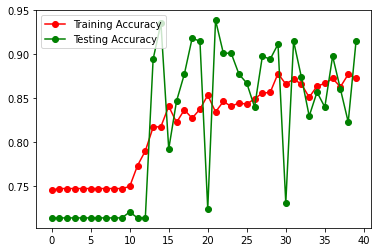

In [152]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

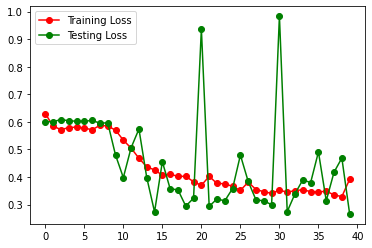

In [153]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [154]:
# https://keras.io/api/preprocessing/image/
val_generator = ImageDataGenerator(rescale=1./255.)
val_datagen = val_generator.flow_from_directory(
    test_folder, 
    batch_size=round(len(df_test)/2), # 14/2 = 7
    target_size=(224, 224),
    shuffle=False
)
# for i in range(5):
#     img, label = pic.next()
#     ax[i].imshow(img[0])
#     ax[i].set_xlabel('Caries' if np.argmax(label) == 0 else 'No-Caries',fontsize=12)

Found 294 images belonging to 2 classes.


In [155]:
Y_true = val_datagen.classes
Y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [156]:
Y_pred  = model.predict(val_datagen).round()
Y_pred[0:5]

2/2 [==============================] - 1s 841ms/step


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [157]:
Y_true_onehot = tf.keras.utils.to_categorical(Y_true)
Y_true_onehot[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [158]:
from sklearn.metrics import confusion_matrix , classification_report
target_names = ['caries','no-caries']
print(classification_report(Y_true_onehot , Y_pred, target_names = target_names))

              precision    recall  f1-score   support

      caries       0.91      0.98      0.94       210
   no-caries       0.94      0.75      0.83        84

   micro avg       0.91      0.91      0.91       294
   macro avg       0.92      0.87      0.89       294
weighted avg       0.92      0.91      0.91       294
 samples avg       0.91      0.91      0.91       294



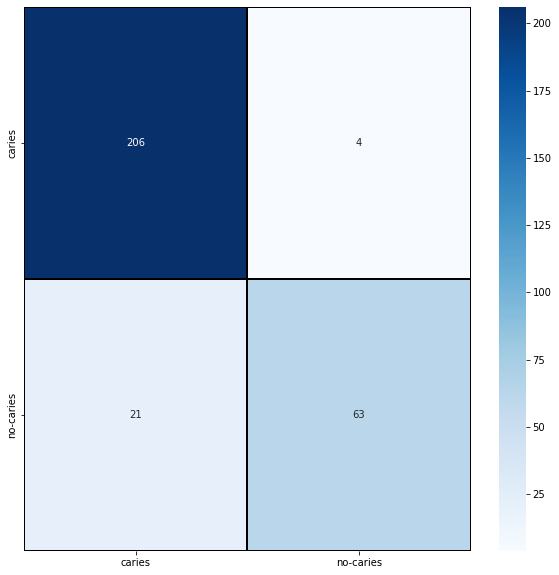

In [159]:
cm = confusion_matrix(Y_true_onehot.argmax(axis = 1) , Y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = ['caries','no-caries'] , columns = ['caries','no-caries'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [160]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,roc_curve, auc
print("roc_auc_score:",roc_auc_score(Y_true_onehot,Y_pred))

roc_auc_score: 0.8654761904761905


In [161]:
precision_score(Y_true_onehot,Y_pred,average=None)

array([0.90748899, 0.94029851])

In [162]:
recall_score(Y_true_onehot,Y_pred,average=None)

array([0.98095238, 0.75      ])

In [163]:
f1_score(Y_true_onehot,Y_pred,average=None)

array([0.94279176, 0.83443709])

In [164]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_true_onehot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [165]:
fpr["micro"], tpr["micro"], _ = roc_curve(Y_true_onehot.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

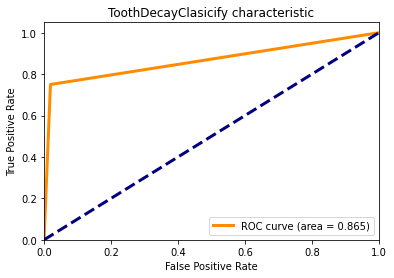

In [166]:
plt.figure()
lw = 3
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ToothDecayClasicify characteristic')
plt.legend(loc="lower right")
plt.show()

<ipython-input-48-c643d80d3064>:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


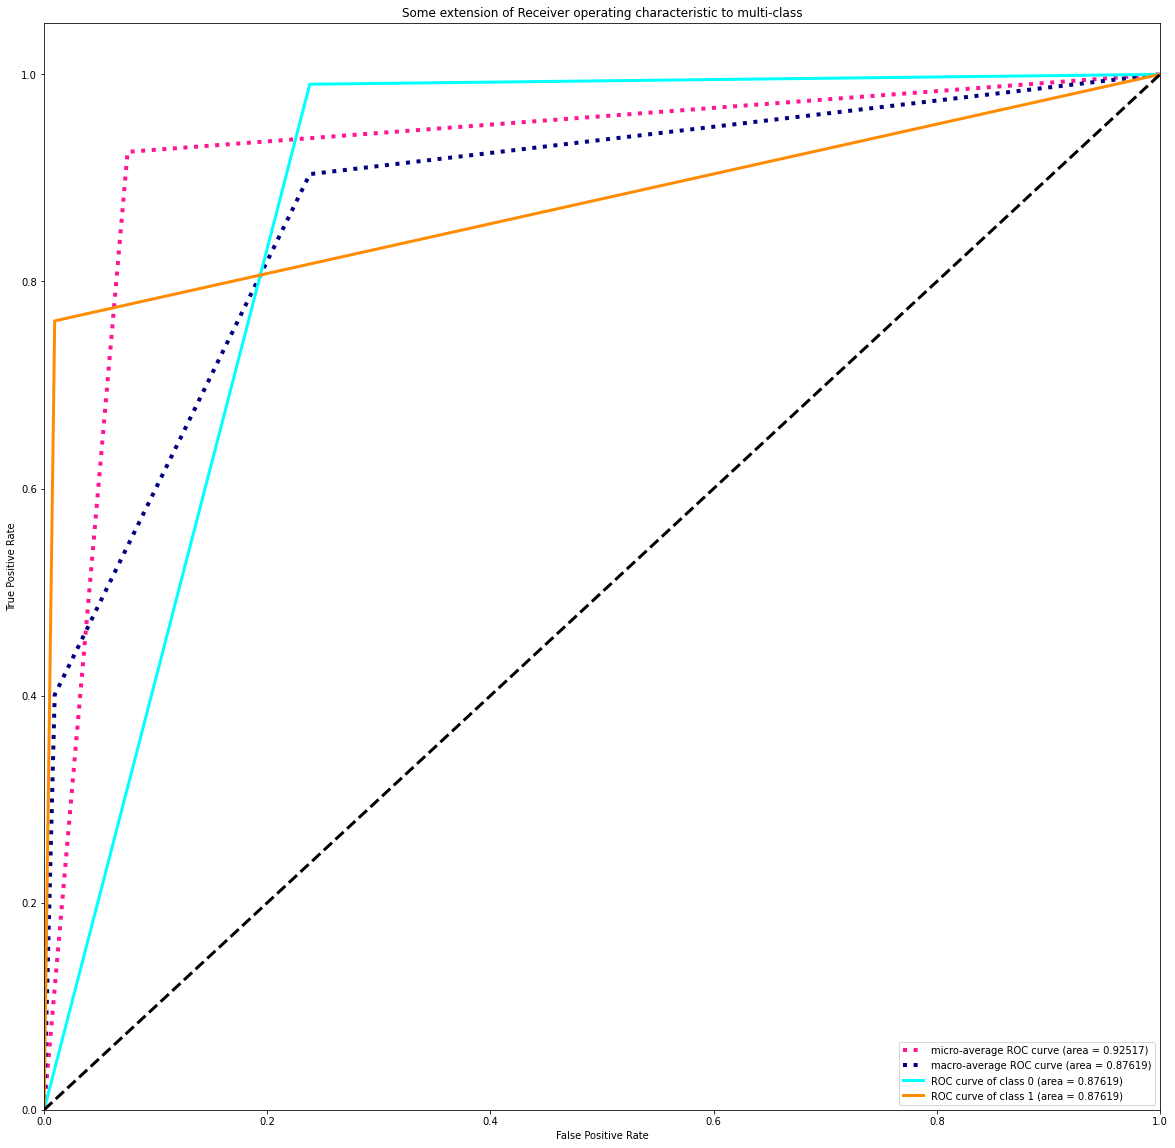

In [ ]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20,20))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.5f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Train By VGG16 Model



In [174]:
# https://keras.io/api/applications/
base_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3),weights=None,include_top=False,classes=2)

In [175]:
modelVGG16 = Sequential()
modelVGG16.add(base_model)
modelVGG16.add(Flatten())
modelVGG16.add(Dense(512, activation="relu"))
modelVGG16.add(Dropout(0.3))
modelVGG16.add(Dense(256, activation="relu"))
modelVGG16.add(Dropout(0.6))
modelVGG16.add(Dense(2, activation="softmax"))
modelVGG16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                

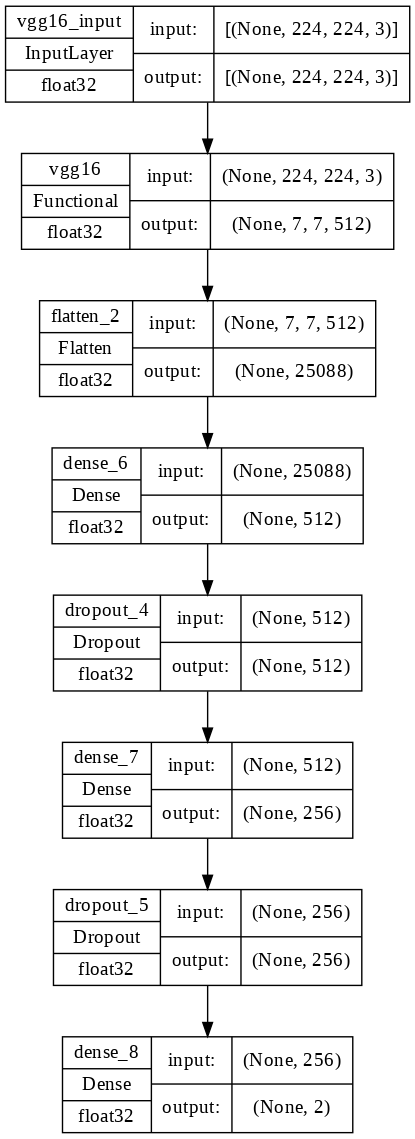

In [176]:
tf.keras.utils.plot_model(modelVGG16, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB",  dpi = 100 ,to_file='VGG16.png')

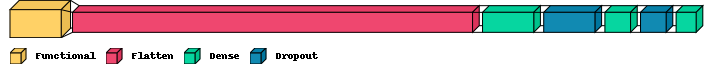

In [177]:
from PIL import ImageFont
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font,to_file='output_VGG16.png')  # font is optional!

In [178]:
# Functone train
# có thể thay thế Adam = RMSprop = SGD
modelVGG16.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [179]:
path_checkpoint = 'tmp/VGG16_checkpoint'
os.makedirs(path_checkpoint,exist_ok=True)

# https://keras.io/api/callbacks/model_checkpoint/
# https://www.tensorflow.org/tensorboard/scalars_and_keras
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc',
                                                mode='max',
                                                 verbose=1)
callback = [Checkpoint, 
             tf.keras.callbacks.EarlyStopping(patience = 5, monitor= "val_acc",verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir = "logs/{}".format('Toothdecay'))]

In [180]:
history = modelVGG16.fit(
    train_datagen,
    validation_data=val_datagen,
    epochs=40,
    callbacks=[
        callback
    ])

Epoch 1/40
127/127 [==============================] - ETA: 0s - loss: 0.6439 - accuracy: 0.7437
Epoch 1: saving model to best_model.h5


127/127 [==============================] - 28s 207ms/step - loss: 0.6439 - accuracy: 0.7437 - val_loss: 0.5973 - val_accuracy: 0.7143
Epoch 2/40
127/127 [==============================] - ETA: 0s - loss: 0.5833 - accuracy: 0.7476
Epoch 2: saving model to best_model.h5


127/127 [==============================] - 25s 196ms/step - loss: 0.5833 - accuracy: 0.7476 - val_loss: 0.6017 - val_accuracy: 0.7143
Epoch 3/40
127/127 [==============================] - ETA: 0s - loss: 0.5820 - accuracy: 0.7476
Epoch 3: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.5820 - accuracy: 0.7476 - val_loss: 0.5874 - val_accuracy: 0.7143
Epoch 4/40
127/127 [==============================] - ETA: 0s - loss: 0.5697 - accuracy: 0.7476
Epoch 4: saving model to best_model.h5


127/127 [==============================] - 26s 205ms/step - loss: 0.5697 - accuracy: 0.7476 - val_loss: 0.5585 - val_accuracy: 0.7143
Epoch 5/40
127/127 [==============================] - ETA: 0s - loss: 0.5091 - accuracy: 0.7468
Epoch 5: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.5091 - accuracy: 0.7468 - val_loss: 0.6228 - val_accuracy: 0.7143
Epoch 6/40
127/127 [==============================] - ETA: 0s - loss: 0.4558 - accuracy: 0.7706
Epoch 6: saving model to best_model.h5


127/127 [==============================] - 25s 197ms/step - loss: 0.4558 - accuracy: 0.7706 - val_loss: 0.3774 - val_accuracy: 0.8776
Epoch 7/40
127/127 [==============================] - ETA: 0s - loss: 0.4749 - accuracy: 0.8046
Epoch 7: saving model to best_model.h5


127/127 [==============================] - 25s 196ms/step - loss: 0.4749 - accuracy: 0.8046 - val_loss: 0.4992 - val_accuracy: 0.7653
Epoch 8/40
127/127 [==============================] - ETA: 0s - loss: 0.4547 - accuracy: 0.8030
Epoch 8: saving model to best_model.h5


127/127 [==============================] - 25s 196ms/step - loss: 0.4547 - accuracy: 0.8030 - val_loss: 0.3733 - val_accuracy: 0.7891
Epoch 9/40
127/127 [==============================] - ETA: 0s - loss: 0.4342 - accuracy: 0.8093
Epoch 9: saving model to best_model.h5


127/127 [==============================] - 25s 197ms/step - loss: 0.4342 - accuracy: 0.8093 - val_loss: 0.3900 - val_accuracy: 0.8027
Epoch 10/40
127/127 [==============================] - ETA: 0s - loss: 0.4426 - accuracy: 0.8117
Epoch 10: saving model to best_model.h5


127/127 [==============================] - 34s 266ms/step - loss: 0.4426 - accuracy: 0.8117 - val_loss: 0.2878 - val_accuracy: 0.9354
Epoch 11/40
127/127 [==============================] - ETA: 0s - loss: 0.4234 - accuracy: 0.8378
Epoch 11: saving model to best_model.h5


127/127 [==============================] - 25s 198ms/step - loss: 0.4234 - accuracy: 0.8378 - val_loss: 0.4194 - val_accuracy: 0.8197
Epoch 12/40
127/127 [==============================] - ETA: 0s - loss: 0.4168 - accuracy: 0.8291
Epoch 12: saving model to best_model.h5


127/127 [==============================] - 25s 197ms/step - loss: 0.4168 - accuracy: 0.8291 - val_loss: 0.2995 - val_accuracy: 0.8878
Epoch 13/40
127/127 [==============================] - ETA: 0s - loss: 0.4007 - accuracy: 0.8426
Epoch 13: saving model to best_model.h5


127/127 [==============================] - 26s 202ms/step - loss: 0.4007 - accuracy: 0.8426 - val_loss: 0.3642 - val_accuracy: 0.8469
Epoch 14/40
127/127 [==============================] - ETA: 0s - loss: 0.4054 - accuracy: 0.8307
Epoch 14: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.4054 - accuracy: 0.8307 - val_loss: 0.3800 - val_accuracy: 0.8163
Epoch 15/40
127/127 [==============================] - ETA: 0s - loss: 0.3874 - accuracy: 0.8426
Epoch 15: saving model to best_model.h5


127/127 [==============================] - 26s 205ms/step - loss: 0.3874 - accuracy: 0.8426 - val_loss: 0.3413 - val_accuracy: 0.8741
Epoch 16/40
127/127 [==============================] - ETA: 0s - loss: 0.4025 - accuracy: 0.8339
Epoch 16: saving model to best_model.h5


127/127 [==============================] - 26s 203ms/step - loss: 0.4025 - accuracy: 0.8339 - val_loss: 0.3799 - val_accuracy: 0.8844
Epoch 17/40
127/127 [==============================] - ETA: 0s - loss: 0.3859 - accuracy: 0.8426
Epoch 17: saving model to best_model.h5


127/127 [==============================] - 26s 203ms/step - loss: 0.3859 - accuracy: 0.8426 - val_loss: 0.3624 - val_accuracy: 0.8333
Epoch 18/40
127/127 [==============================] - ETA: 0s - loss: 0.3844 - accuracy: 0.8354
Epoch 18: saving model to best_model.h5


127/127 [==============================] - 26s 201ms/step - loss: 0.3844 - accuracy: 0.8354 - val_loss: 0.3010 - val_accuracy: 0.8980
Epoch 19/40
127/127 [==============================] - ETA: 0s - loss: 0.3741 - accuracy: 0.8394
Epoch 19: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.3741 - accuracy: 0.8394 - val_loss: 0.3529 - val_accuracy: 0.8605
Epoch 20/40
127/127 [==============================] - ETA: 0s - loss: 0.3594 - accuracy: 0.8481
Epoch 20: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.3594 - accuracy: 0.8481 - val_loss: 0.3290 - val_accuracy: 0.9286
Epoch 21/40
127/127 [==============================] - ETA: 0s - loss: 0.3656 - accuracy: 0.8394
Epoch 21: saving model to best_model.h5


127/127 [==============================] - 27s 210ms/step - loss: 0.3656 - accuracy: 0.8394 - val_loss: 0.3215 - val_accuracy: 0.8912
Epoch 22/40
127/127 [==============================] - ETA: 0s - loss: 0.3444 - accuracy: 0.8639
Epoch 22: saving model to best_model.h5


127/127 [==============================] - 25s 197ms/step - loss: 0.3444 - accuracy: 0.8639 - val_loss: 0.2762 - val_accuracy: 0.9388
Epoch 23/40
127/127 [==============================] - ETA: 0s - loss: 0.3931 - accuracy: 0.8584
Epoch 23: saving model to best_model.h5


127/127 [==============================] - 25s 197ms/step - loss: 0.3931 - accuracy: 0.8584 - val_loss: 0.4723 - val_accuracy: 0.8163
Epoch 24/40
127/127 [==============================] - ETA: 0s - loss: 0.3577 - accuracy: 0.8473
Epoch 24: saving model to best_model.h5


127/127 [==============================] - 25s 197ms/step - loss: 0.3577 - accuracy: 0.8473 - val_loss: 0.3296 - val_accuracy: 0.9082
Epoch 25/40
127/127 [==============================] - ETA: 0s - loss: 0.3433 - accuracy: 0.8576
Epoch 25: saving model to best_model.h5


127/127 [==============================] - 26s 208ms/step - loss: 0.3433 - accuracy: 0.8576 - val_loss: 0.3279 - val_accuracy: 0.8741
Epoch 26/40
127/127 [==============================] - ETA: 0s - loss: 0.3368 - accuracy: 0.8647
Epoch 26: saving model to best_model.h5


127/127 [==============================] - 26s 205ms/step - loss: 0.3368 - accuracy: 0.8647 - val_loss: 0.6890 - val_accuracy: 0.8435
Epoch 27/40
127/127 [==============================] - ETA: 0s - loss: 0.3566 - accuracy: 0.8663
Epoch 27: saving model to best_model.h5


127/127 [==============================] - 26s 206ms/step - loss: 0.3566 - accuracy: 0.8663 - val_loss: 0.3228 - val_accuracy: 0.8844
Epoch 28/40
127/127 [==============================] - ETA: 0s - loss: 0.3356 - accuracy: 0.8703
Epoch 28: saving model to best_model.h5


127/127 [==============================] - 26s 205ms/step - loss: 0.3356 - accuracy: 0.8703 - val_loss: 0.4200 - val_accuracy: 0.9218
Epoch 29/40
127/127 [==============================] - ETA: 0s - loss: 0.3260 - accuracy: 0.8639
Epoch 29: saving model to best_model.h5


127/127 [==============================] - 26s 205ms/step - loss: 0.3260 - accuracy: 0.8639 - val_loss: 0.3337 - val_accuracy: 0.8946
Epoch 30/40
127/127 [==============================] - ETA: 0s - loss: 0.3392 - accuracy: 0.8568
Epoch 30: saving model to best_model.h5


127/127 [==============================] - 27s 213ms/step - loss: 0.3392 - accuracy: 0.8568 - val_loss: 0.3315 - val_accuracy: 0.8810
Epoch 31/40
127/127 [==============================] - ETA: 0s - loss: 0.3359 - accuracy: 0.8774
Epoch 31: saving model to best_model.h5


127/127 [==============================] - 26s 203ms/step - loss: 0.3359 - accuracy: 0.8774 - val_loss: 0.2579 - val_accuracy: 0.9490
Epoch 32/40
127/127 [==============================] - ETA: 0s - loss: 0.3246 - accuracy: 0.8671
Epoch 32: saving model to best_model.h5


127/127 [==============================] - 26s 203ms/step - loss: 0.3246 - accuracy: 0.8671 - val_loss: 0.2701 - val_accuracy: 0.8810
Epoch 33/40
127/127 [==============================] - ETA: 0s - loss: 0.3188 - accuracy: 0.8782
Epoch 33: saving model to best_model.h5


127/127 [==============================] - 26s 200ms/step - loss: 0.3188 - accuracy: 0.8782 - val_loss: 0.2797 - val_accuracy: 0.8980
Epoch 34/40
127/127 [==============================] - ETA: 0s - loss: 0.3179 - accuracy: 0.8718
Epoch 34: saving model to best_model.h5


127/127 [==============================] - 26s 203ms/step - loss: 0.3179 - accuracy: 0.8718 - val_loss: 0.3670 - val_accuracy: 0.8333
Epoch 35/40
127/127 [==============================] - ETA: 0s - loss: 0.2908 - accuracy: 0.8734
Epoch 35: saving model to best_model.h5


127/127 [==============================] - 26s 203ms/step - loss: 0.2908 - accuracy: 0.8734 - val_loss: 0.5254 - val_accuracy: 0.7891
Epoch 36/40
127/127 [==============================] - ETA: 0s - loss: 0.3163 - accuracy: 0.8908
Epoch 36: saving model to best_model.h5


127/127 [==============================] - 26s 203ms/step - loss: 0.3163 - accuracy: 0.8908 - val_loss: 0.3120 - val_accuracy: 0.8673
Epoch 37/40
127/127 [==============================] - ETA: 0s - loss: 0.3078 - accuracy: 0.8790
Epoch 37: saving model to best_model.h5


127/127 [==============================] - 26s 201ms/step - loss: 0.3078 - accuracy: 0.8790 - val_loss: 0.2977 - val_accuracy: 0.8980
Epoch 38/40
127/127 [==============================] - ETA: 0s - loss: 0.3200 - accuracy: 0.8766
Epoch 38: saving model to best_model.h5


127/127 [==============================] - 26s 202ms/step - loss: 0.3200 - accuracy: 0.8766 - val_loss: 0.2615 - val_accuracy: 0.9286
Epoch 39/40
127/127 [==============================] - ETA: 0s - loss: 0.3086 - accuracy: 0.8861
Epoch 39: saving model to best_model.h5


127/127 [==============================] - 26s 204ms/step - loss: 0.3086 - accuracy: 0.8861 - val_loss: 0.3166 - val_accuracy: 0.8844
Epoch 40/40
127/127 [==============================] - ETA: 0s - loss: 0.3107 - accuracy: 0.8710
Epoch 40: saving model to best_model.h5


127/127 [==============================] - 26s 204ms/step - loss: 0.3107 - accuracy: 0.8710 - val_loss: 0.2552 - val_accuracy: 0.9184


# Plot Accuracy and Loss VGG16

In [181]:
# Load the TensorBoard notebook extension.
# %load_ext tensorboard
# %tensorboard --logdir logs/Toothdecay

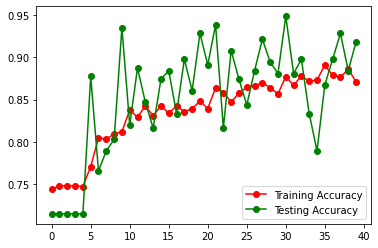

In [182]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

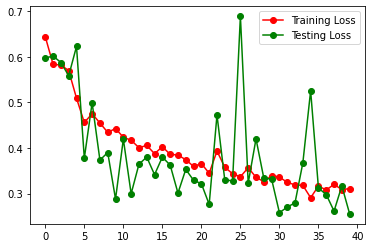

In [183]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [184]:
# https://keras.io/api/preprocessing/image/
val_generator = ImageDataGenerator(rescale=1./255.)
val_datagen = val_generator.flow_from_directory(
    test_folder, 
    batch_size=round(len(df_test)/2), # 14/2 = 7
    target_size=(224, 224),
    shuffle=False
)
# for i in range(5):
#     img, label = pic.next()
#     ax[i].imshow(img[0])
#     ax[i].set_xlabel('Caries' if np.argmax(label) == 0 else 'No-Caries',fontsize=12)

Found 294 images belonging to 2 classes.


In [185]:
Y_true = val_datagen.classes
Y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [186]:
Y_pred  = modelVGG16.predict(val_datagen).round()
Y_pred[0:5]

2/2 [==============================] - 1s 767ms/step


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [187]:
Y_true_onehot = tf.keras.utils.to_categorical(Y_true)
Y_true_onehot[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [188]:
from sklearn.metrics import confusion_matrix , classification_report
target_names = ['caries','no-caries']
print(classification_report(Y_true_onehot , Y_pred, target_names = target_names))

              precision    recall  f1-score   support

      caries       0.92      0.98      0.94       210
   no-caries       0.93      0.77      0.84        84

   micro avg       0.92      0.92      0.92       294
   macro avg       0.92      0.88      0.89       294
weighted avg       0.92      0.92      0.92       294
 samples avg       0.92      0.92      0.92       294



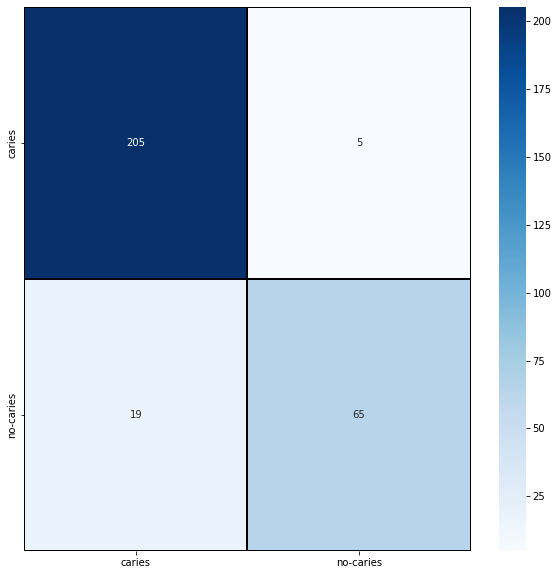

In [189]:
cm = confusion_matrix(Y_true_onehot.argmax(axis = 1) , Y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = ['caries','no-caries'] , columns = ['caries','no-caries'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [190]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,roc_curve, auc
print("roc_auc_score:",roc_auc_score(Y_true_onehot,Y_pred))

roc_auc_score: 0.875


In [191]:
precision_score(Y_true_onehot,Y_pred,average=None)

array([0.91517857, 0.92857143])

In [192]:
recall_score(Y_true_onehot,Y_pred,average=None)

array([0.97619048, 0.77380952])

In [193]:
f1_score(Y_true_onehot,Y_pred,average=None)

array([0.94470046, 0.84415584])

In [194]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_true_onehot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [195]:
fpr["micro"], tpr["micro"], _ = roc_curve(Y_true_onehot.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

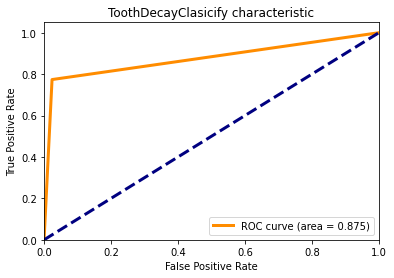

In [196]:
plt.figure()
lw = 3
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ToothDecayClasicify characteristic')
plt.legend(loc="lower right")
plt.show()

<ipython-input-197-c643d80d3064>:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


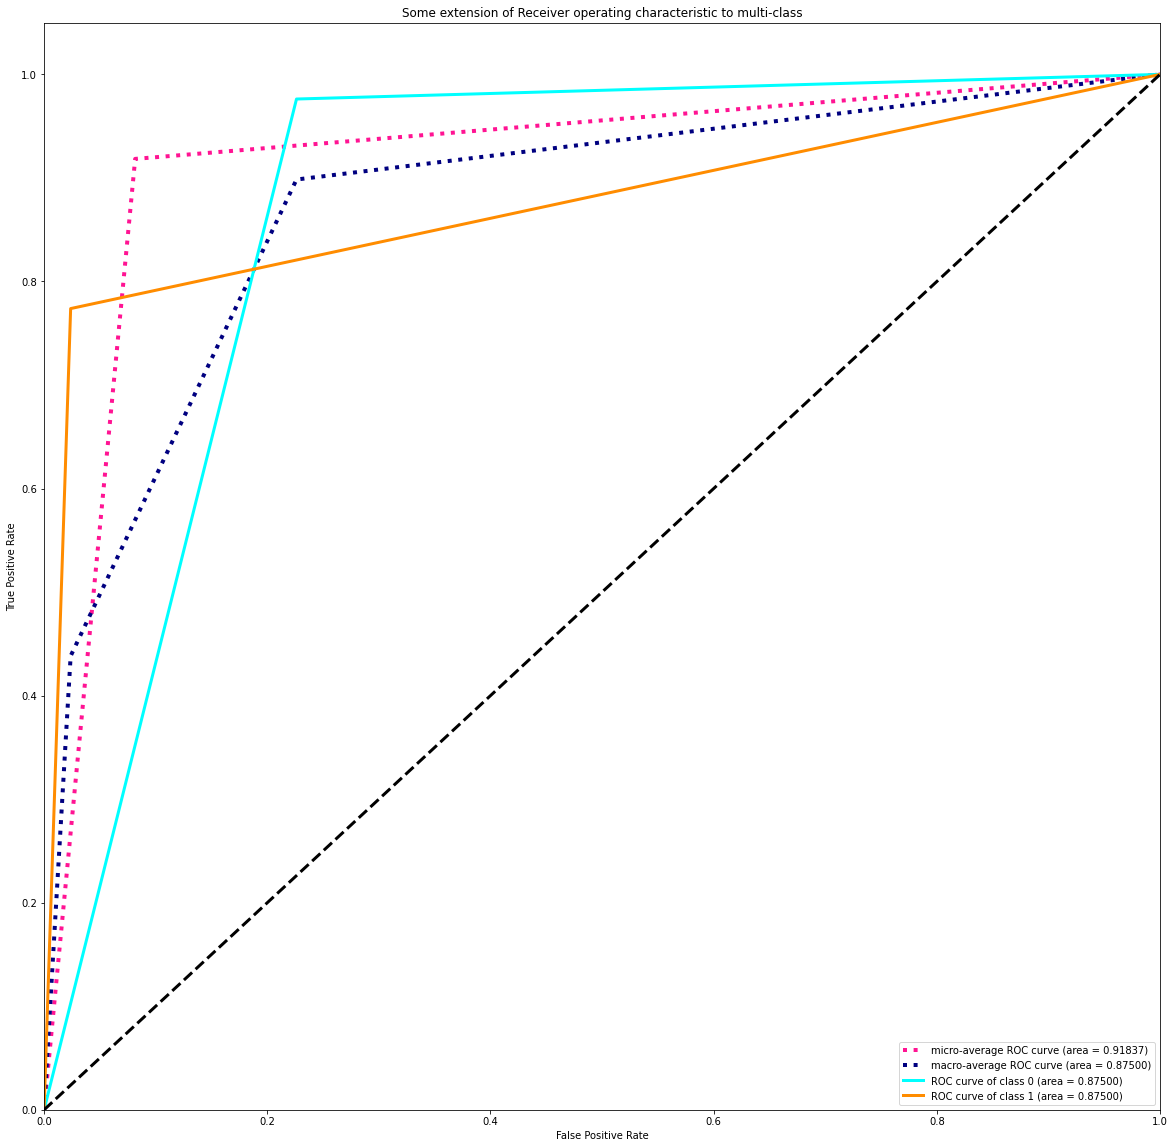

In [197]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20,20))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.5f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install google.colab
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.8 MB/s eta 0:00:00


#Train By ResNet50 Model


In [ ]:
# using Pre-trained model " ResNet50 "

In [ ]:
# https://keras.io/api/applications/
base_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3),weights=None,include_top=False,classes=2)

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 512)               51380736  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                

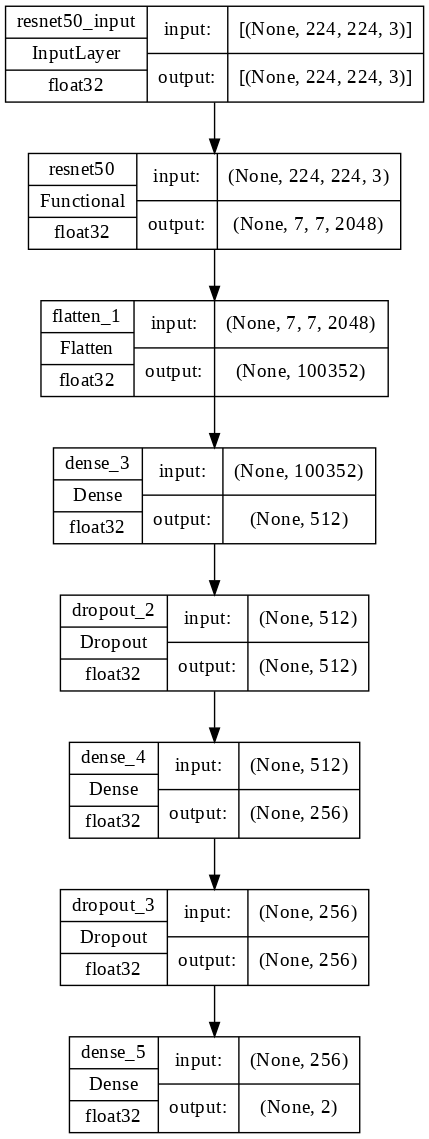

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB", dpi = 100 ,to_file='ResNet50.png')

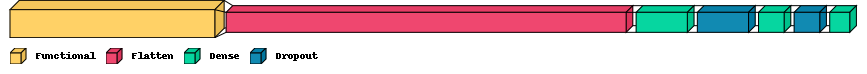

In [ ]:
from PIL import ImageFont
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font,to_file='output_ResNet50.png')  # font is optional!

In [ ]:
# Functone train
# có thể thay thế Adam = RMSprop = SGD
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
path_checkpoint = 'tmp/ResNet50_checkpoint'
os.makedirs(path_checkpoint,exist_ok=True)

# https://keras.io/api/callbacks/model_checkpoint/
# https://www.tensorflow.org/tensorboard/scalars_and_keras
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc',
                                                mode='max',
                                                 verbose=1)
callback = [Checkpoint, 
             tf.keras.callbacks.EarlyStopping(patience = 5, monitor= "val_acc",verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir = "logs/{}".format('Toothdecay'))]

In [ ]:
history = model.fit(
    train_datagen,
    validation_data=val_datagen,
    epochs=40,
    callbacks=[
        callback
    ])

Epoch 1/40
127/127 [==============================] - ETA: 0s - loss: 6.6191 - accuracy: 0.6408
Epoch 1: saving model to best_model.h5


127/127 [==============================] - 52s 311ms/step - loss: 6.6191 - accuracy: 0.6408 - val_loss: 0.7144 - val_accuracy: 0.2857
Epoch 2/40
127/127 [==============================] - ETA: 0s - loss: 2.4158 - accuracy: 0.6479
Epoch 2: saving model to best_model.h5


127/127 [==============================] - 26s 205ms/step - loss: 2.4158 - accuracy: 0.6479 - val_loss: 0.6293 - val_accuracy: 0.7143
Epoch 3/40
127/127 [==============================] - ETA: 0s - loss: 1.3512 - accuracy: 0.6559
Epoch 3: saving model to best_model.h5


127/127 [==============================] - 27s 211ms/step - loss: 1.3512 - accuracy: 0.6559 - val_loss: 0.6005 - val_accuracy: 0.7143
Epoch 4/40
127/127 [==============================] - ETA: 0s - loss: 0.8530 - accuracy: 0.6653
Epoch 4: saving model to best_model.h5


127/127 [==============================] - 26s 206ms/step - loss: 0.8530 - accuracy: 0.6653 - val_loss: 0.5566 - val_accuracy: 0.7143
Epoch 5/40
127/127 [==============================] - ETA: 0s - loss: 0.7424 - accuracy: 0.6915
Epoch 5: saving model to best_model.h5


127/127 [==============================] - 25s 197ms/step - loss: 0.7424 - accuracy: 0.6915 - val_loss: 0.7692 - val_accuracy: 0.7143
Epoch 6/40
127/127 [==============================] - ETA: 0s - loss: 0.6707 - accuracy: 0.7128
Epoch 6: saving model to best_model.h5


127/127 [==============================] - 25s 198ms/step - loss: 0.6707 - accuracy: 0.7128 - val_loss: 0.5059 - val_accuracy: 0.7143
Epoch 7/40
127/127 [==============================] - ETA: 0s - loss: 0.6225 - accuracy: 0.7429
Epoch 7: saving model to best_model.h5


127/127 [==============================] - 27s 208ms/step - loss: 0.6225 - accuracy: 0.7429 - val_loss: 1.3539 - val_accuracy: 0.7143
Epoch 8/40
127/127 [==============================] - ETA: 0s - loss: 0.6305 - accuracy: 0.7397
Epoch 8: saving model to best_model.h5


127/127 [==============================] - 25s 198ms/step - loss: 0.6305 - accuracy: 0.7397 - val_loss: 0.6249 - val_accuracy: 0.7143
Epoch 9/40
127/127 [==============================] - ETA: 0s - loss: 0.6200 - accuracy: 0.7476
Epoch 9: saving model to best_model.h5


127/127 [==============================] - 26s 206ms/step - loss: 0.6200 - accuracy: 0.7476 - val_loss: 0.9597 - val_accuracy: 0.7143
Epoch 10/40
127/127 [==============================] - ETA: 0s - loss: 0.6241 - accuracy: 0.7429
Epoch 10: saving model to best_model.h5


127/127 [==============================] - 25s 198ms/step - loss: 0.6241 - accuracy: 0.7429 - val_loss: 0.4789 - val_accuracy: 0.7143
Epoch 11/40
127/127 [==============================] - ETA: 0s - loss: 0.5775 - accuracy: 0.7445
Epoch 11: saving model to best_model.h5


127/127 [==============================] - 31s 246ms/step - loss: 0.5775 - accuracy: 0.7445 - val_loss: 1.4436 - val_accuracy: 0.7143
Epoch 12/40
127/127 [==============================] - ETA: 0s - loss: 0.5932 - accuracy: 0.7413
Epoch 12: saving model to best_model.h5


127/127 [==============================] - 25s 197ms/step - loss: 0.5932 - accuracy: 0.7413 - val_loss: 0.7619 - val_accuracy: 0.7143
Epoch 13/40
127/127 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.7405
Epoch 13: saving model to best_model.h5


127/127 [==============================] - 26s 206ms/step - loss: 0.5568 - accuracy: 0.7405 - val_loss: 0.7942 - val_accuracy: 0.7143
Epoch 14/40
127/127 [==============================] - ETA: 0s - loss: 0.5558 - accuracy: 0.7476
Epoch 14: saving model to best_model.h5


127/127 [==============================] - 25s 198ms/step - loss: 0.5558 - accuracy: 0.7476 - val_loss: 4.0680 - val_accuracy: 0.7143
Epoch 15/40
127/127 [==============================] - ETA: 0s - loss: 0.5986 - accuracy: 0.7460
Epoch 15: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.5986 - accuracy: 0.7460 - val_loss: 0.8517 - val_accuracy: 0.7143
Epoch 16/40
127/127 [==============================] - ETA: 0s - loss: 0.5658 - accuracy: 0.7437
Epoch 16: saving model to best_model.h5


127/127 [==============================] - 26s 207ms/step - loss: 0.5658 - accuracy: 0.7437 - val_loss: 0.4718 - val_accuracy: 0.7143
Epoch 17/40
127/127 [==============================] - ETA: 0s - loss: 0.5549 - accuracy: 0.7429
Epoch 17: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.5549 - accuracy: 0.7429 - val_loss: 0.5030 - val_accuracy: 0.7143
Epoch 18/40
127/127 [==============================] - ETA: 0s - loss: 0.5860 - accuracy: 0.7437
Epoch 18: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.5860 - accuracy: 0.7437 - val_loss: 0.6131 - val_accuracy: 0.7143
Epoch 19/40
127/127 [==============================] - ETA: 0s - loss: 0.5717 - accuracy: 0.7460
Epoch 19: saving model to best_model.h5


127/127 [==============================] - 26s 206ms/step - loss: 0.5717 - accuracy: 0.7460 - val_loss: 0.7955 - val_accuracy: 0.7143
Epoch 20/40
127/127 [==============================] - ETA: 0s - loss: 0.5792 - accuracy: 0.7476
Epoch 20: saving model to best_model.h5


127/127 [==============================] - 25s 198ms/step - loss: 0.5792 - accuracy: 0.7476 - val_loss: 1.7639 - val_accuracy: 0.7143
Epoch 21/40
127/127 [==============================] - ETA: 0s - loss: 0.5782 - accuracy: 0.7468
Epoch 21: saving model to best_model.h5


127/127 [==============================] - 26s 207ms/step - loss: 0.5782 - accuracy: 0.7468 - val_loss: 0.5083 - val_accuracy: 0.7143
Epoch 22/40
127/127 [==============================] - ETA: 0s - loss: 0.5749 - accuracy: 0.7460
Epoch 22: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.5749 - accuracy: 0.7460 - val_loss: 0.5221 - val_accuracy: 0.7143
Epoch 23/40
127/127 [==============================] - ETA: 0s - loss: 0.5573 - accuracy: 0.7468
Epoch 23: saving model to best_model.h5


127/127 [==============================] - 25s 198ms/step - loss: 0.5573 - accuracy: 0.7468 - val_loss: 0.6328 - val_accuracy: 0.7143
Epoch 24/40
127/127 [==============================] - ETA: 0s - loss: 0.5432 - accuracy: 0.7476
Epoch 24: saving model to best_model.h5


127/127 [==============================] - 26s 207ms/step - loss: 0.5432 - accuracy: 0.7476 - val_loss: 0.6182 - val_accuracy: 0.7143
Epoch 25/40
127/127 [==============================] - ETA: 0s - loss: 0.6065 - accuracy: 0.7468
Epoch 25: saving model to best_model.h5


127/127 [==============================] - 25s 197ms/step - loss: 0.6065 - accuracy: 0.7468 - val_loss: 0.7808 - val_accuracy: 0.7143
Epoch 26/40
127/127 [==============================] - ETA: 0s - loss: 0.5783 - accuracy: 0.7476
Epoch 26: saving model to best_model.h5


127/127 [==============================] - 25s 198ms/step - loss: 0.5783 - accuracy: 0.7476 - val_loss: 0.4202 - val_accuracy: 0.7143
Epoch 27/40
127/127 [==============================] - ETA: 0s - loss: 0.5516 - accuracy: 0.7476
Epoch 27: saving model to best_model.h5


127/127 [==============================] - 26s 203ms/step - loss: 0.5516 - accuracy: 0.7476 - val_loss: 0.4399 - val_accuracy: 0.7143
Epoch 28/40
127/127 [==============================] - ETA: 0s - loss: 0.5603 - accuracy: 0.7468
Epoch 28: saving model to best_model.h5


127/127 [==============================] - 25s 198ms/step - loss: 0.5603 - accuracy: 0.7468 - val_loss: 1.4672 - val_accuracy: 0.7143
Epoch 29/40
127/127 [==============================] - ETA: 0s - loss: 0.6177 - accuracy: 0.7476
Epoch 29: saving model to best_model.h5


127/127 [==============================] - 27s 214ms/step - loss: 0.6177 - accuracy: 0.7476 - val_loss: 0.4967 - val_accuracy: 0.7143
Epoch 30/40
127/127 [==============================] - ETA: 0s - loss: 0.6070 - accuracy: 0.7468
Epoch 30: saving model to best_model.h5


127/127 [==============================] - 25s 200ms/step - loss: 0.6070 - accuracy: 0.7468 - val_loss: 0.8603 - val_accuracy: 0.7143
Epoch 31/40
127/127 [==============================] - ETA: 0s - loss: 0.5852 - accuracy: 0.7476
Epoch 31: saving model to best_model.h5


127/127 [==============================] - 26s 207ms/step - loss: 0.5852 - accuracy: 0.7476 - val_loss: 5.7837 - val_accuracy: 0.7143
Epoch 32/40
127/127 [==============================] - ETA: 0s - loss: 0.5830 - accuracy: 0.7476
Epoch 32: saving model to best_model.h5


127/127 [==============================] - 26s 200ms/step - loss: 0.5830 - accuracy: 0.7476 - val_loss: 1.0254 - val_accuracy: 0.7143
Epoch 33/40
127/127 [==============================] - ETA: 0s - loss: 0.6231 - accuracy: 0.7476
Epoch 33: saving model to best_model.h5


127/127 [==============================] - 26s 207ms/step - loss: 0.6231 - accuracy: 0.7476 - val_loss: 1.1827 - val_accuracy: 0.7143
Epoch 34/40
127/127 [==============================] - ETA: 0s - loss: 0.6148 - accuracy: 0.7476
Epoch 34: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.6148 - accuracy: 0.7476 - val_loss: 0.5727 - val_accuracy: 0.7143
Epoch 35/40
127/127 [==============================] - ETA: 0s - loss: 0.5829 - accuracy: 0.7468
Epoch 35: saving model to best_model.h5


127/127 [==============================] - 26s 201ms/step - loss: 0.5829 - accuracy: 0.7468 - val_loss: 0.5295 - val_accuracy: 0.7143
Epoch 36/40
127/127 [==============================] - ETA: 0s - loss: 0.5862 - accuracy: 0.7476
Epoch 36: saving model to best_model.h5


127/127 [==============================] - 26s 207ms/step - loss: 0.5862 - accuracy: 0.7476 - val_loss: 0.7761 - val_accuracy: 0.7143
Epoch 37/40
127/127 [==============================] - ETA: 0s - loss: 0.5648 - accuracy: 0.7476
Epoch 37: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.5648 - accuracy: 0.7476 - val_loss: 1.9604 - val_accuracy: 0.7143
Epoch 38/40
127/127 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.7476
Epoch 38: saving model to best_model.h5


127/127 [==============================] - 25s 199ms/step - loss: 0.6897 - accuracy: 0.7476 - val_loss: 0.6457 - val_accuracy: 0.7143
Epoch 39/40
127/127 [==============================] - ETA: 0s - loss: 0.5913 - accuracy: 0.7476
Epoch 39: saving model to best_model.h5


127/127 [==============================] - 26s 206ms/step - loss: 0.5913 - accuracy: 0.7476 - val_loss: 0.9494 - val_accuracy: 0.7143
Epoch 40/40
127/127 [==============================] - ETA: 0s - loss: 0.5654 - accuracy: 0.7476
Epoch 40: saving model to best_model.h5


127/127 [==============================] - 25s 198ms/step - loss: 0.5654 - accuracy: 0.7476 - val_loss: 0.6759 - val_accuracy: 0.7143


# Plot Accuracy and Loss ResNet50

In [ ]:
# Load the TensorBoard notebook extension.
# %load_ext tensorboard
# %tensorboard --logdir logs/Toothdecay

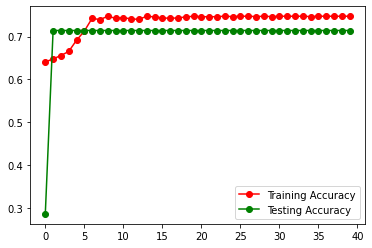

In [ ]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

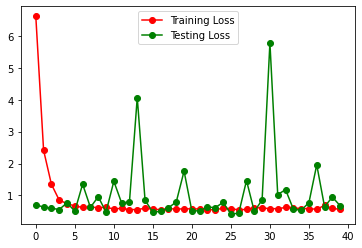

In [ ]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [ ]:
# https://keras.io/api/preprocessing/image/
val_generator = ImageDataGenerator(rescale=1./255.)
val_datagen = val_generator.flow_from_directory(
    test_folder, 
    batch_size=round(len(df_test)/2), # 14/2 = 7
    target_size=(224, 224),
    shuffle=False
)
# for i in range(5):
#     img, label = pic.next()
#     ax[i].imshow(img[0])
#     ax[i].set_xlabel('Caries' if np.argmax(label) == 0 else 'No-Caries',fontsize=12)

Found 294 images belonging to 2 classes.


In [ ]:
Y_true = val_datagen.classes
Y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
Y_pred  = model.predict(val_datagen).round()
Y_pred[0:5]

2/2 [==============================] - 2s 482ms/step


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
Y_true_onehot = tf.keras.utils.to_categorical(Y_true)
Y_true_onehot[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
target_names = ['caries','no-caries']
print(classification_report(Y_true_onehot , Y_pred, target_names = target_names))

              precision    recall  f1-score   support

      caries       0.71      1.00      0.83       210
   no-caries       0.00      0.00      0.00        84

   micro avg       0.71      0.71      0.71       294
   macro avg       0.36      0.50      0.42       294
weighted avg       0.51      0.71      0.60       294
 samples avg       0.71      0.71      0.71       294



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


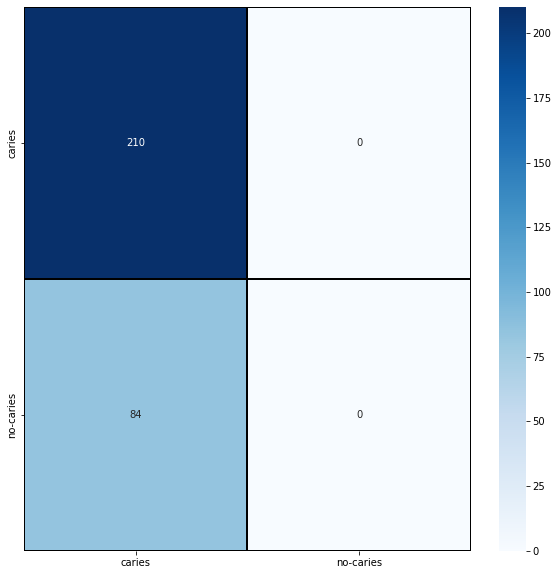

In [ ]:
cm = confusion_matrix(Y_true_onehot.argmax(axis = 1) , Y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = ['caries','no-caries'] , columns = ['caries','no-caries'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,roc_curve, auc
print("roc_auc_score:",roc_auc_score(Y_true_onehot,Y_pred))

roc_auc_score: 0.5


In [ ]:
precision_score(Y_true_onehot,Y_pred,average=None)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.71428571, 0.        ])

In [ ]:
recall_score(Y_true_onehot,Y_pred,average=None)

array([1., 0.])

In [ ]:
f1_score(Y_true_onehot,Y_pred,average=None)

array([0.83333333, 0.        ])

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_true_onehot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(Y_true_onehot.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

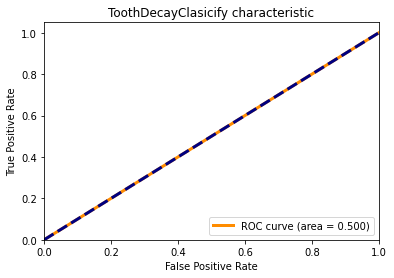

In [ ]:
plt.figure()
lw = 3
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ToothDecayClasicify characteristic')
plt.legend(loc="lower right")
plt.show()

<ipython-input-76-c643d80d3064>:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


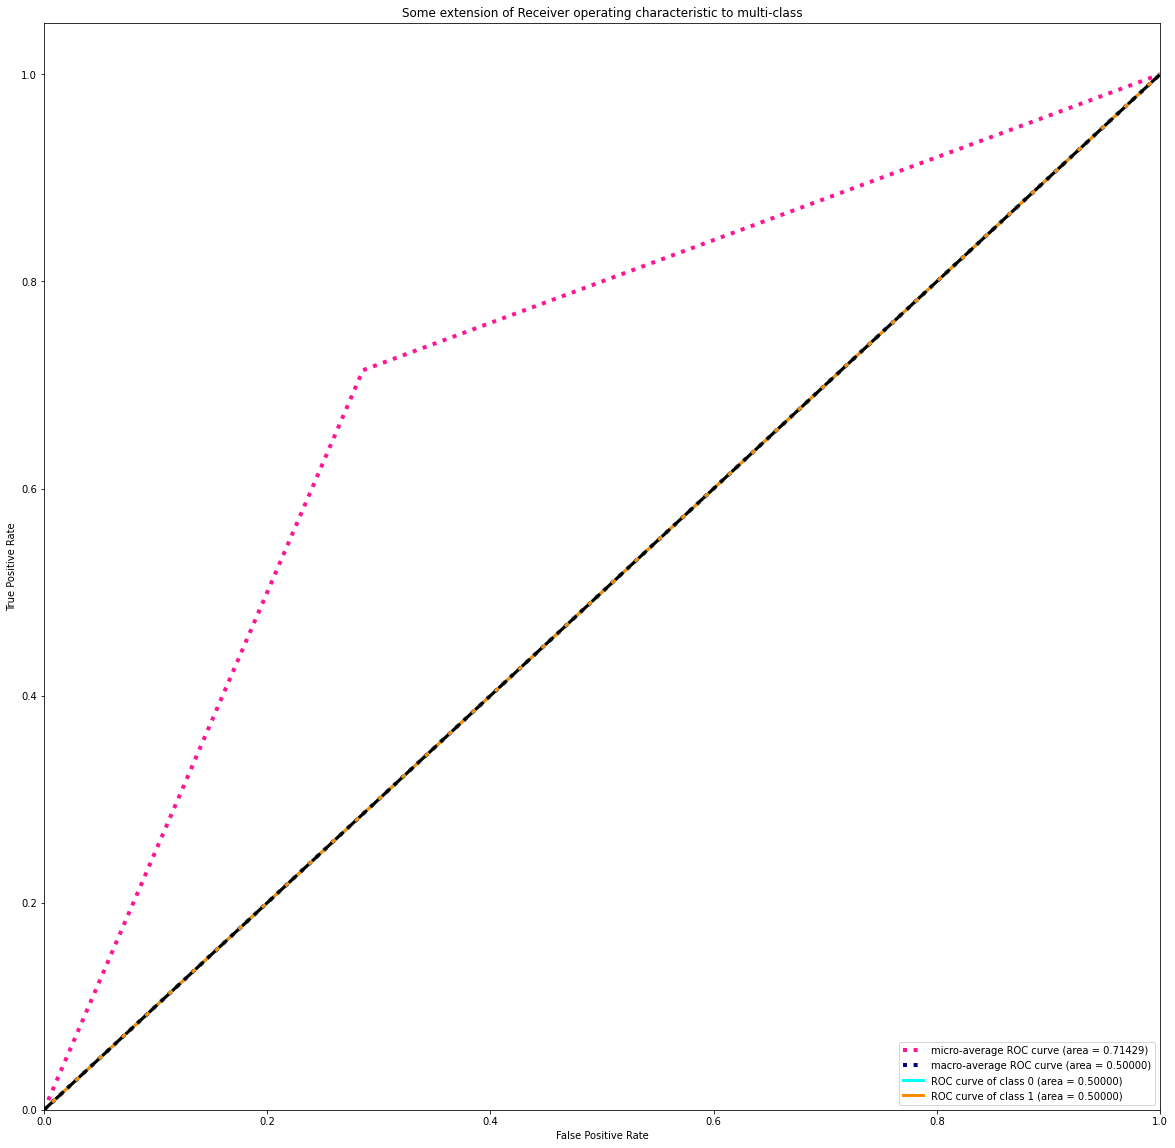

In [ ]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20,20))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.5f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Train By DenseNet121 Model


In [ ]:
# using Pre-trained model " DenseNet121 "

In [ ]:
# https://keras.io/api/applications/
base_model = tf.keras.applications.DenseNet121(input_shape=(224, 224, 3),weights=None,include_top=False,classes=2)

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 512)               25690624  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 5

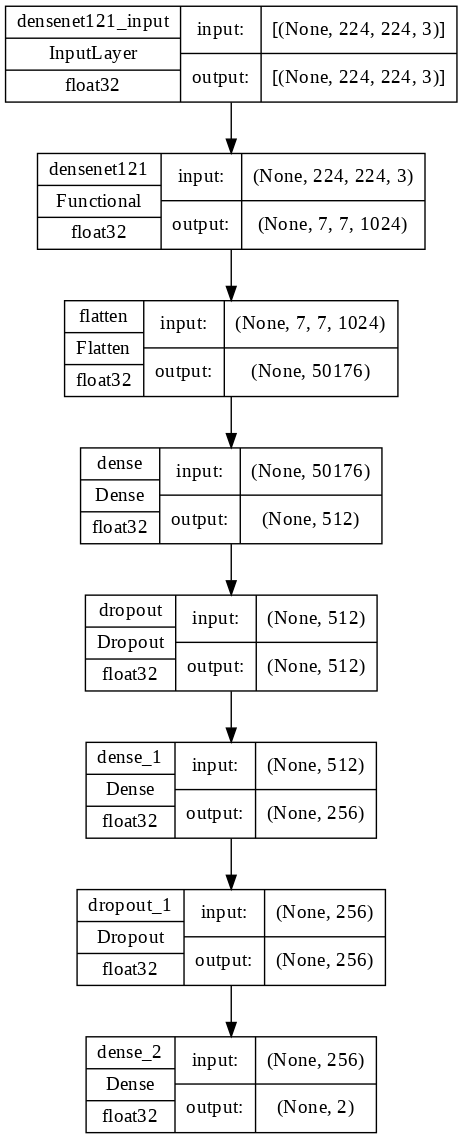

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB", dpi = 100 ,to_file='DenseNet121.png')

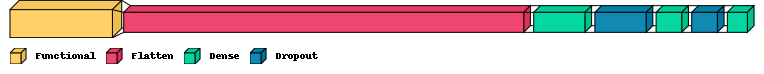

In [ ]:
from PIL import ImageFont
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font,to_file='output_DenseNet121.png')  # font is optional!

In [ ]:
# Functone train
# có thể thay thế Adam = RMSprop = SGD
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
path_checkpoint = 'tmp/DenseNet121_checkpoint'
os.makedirs(path_checkpoint,exist_ok=True)

# https://keras.io/api/callbacks/model_checkpoint/
# https://www.tensorflow.org/tensorboard/scalars_and_keras
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc',
                                                mode='max',
                                                 verbose=1)
callback = [Checkpoint, 
             tf.keras.callbacks.EarlyStopping(patience = 5, monitor= "val_acc",verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir = "logs/{}".format('Toothdecay'))]

In [ ]:
history = model.fit(
    train_datagen,
    validation_data=val_datagen,
    epochs=40,
    callbacks=[
        callback
    ])

Epoch 1/40
127/127 [==============================] - ETA: 0s - loss: 1.6293 - accuracy: 0.6432
Epoch 1: saving model to best_model.h5


127/127 [==============================] - 55s 229ms/step - loss: 1.6293 - accuracy: 0.6432 - val_loss: 0.6292 - val_accuracy: 0.7143
Epoch 2/40
127/127 [==============================] - ETA: 0s - loss: 0.9843 - accuracy: 0.6748
Epoch 2: saving model to best_model.h5


127/127 [==============================] - 25s 192ms/step - loss: 0.9843 - accuracy: 0.6748 - val_loss: 0.5947 - val_accuracy: 0.7143
Epoch 3/40
127/127 [==============================] - ETA: 0s - loss: 0.8302 - accuracy: 0.6994
Epoch 3: saving model to best_model.h5


127/127 [==============================] - 26s 207ms/step - loss: 0.8302 - accuracy: 0.6994 - val_loss: 0.5907 - val_accuracy: 0.7143
Epoch 4/40
127/127 [==============================] - ETA: 0s - loss: 0.6485 - accuracy: 0.7073
Epoch 4: saving model to best_model.h5


127/127 [==============================] - 25s 195ms/step - loss: 0.6485 - accuracy: 0.7073 - val_loss: 0.5151 - val_accuracy: 0.7211
Epoch 5/40
127/127 [==============================] - ETA: 0s - loss: 0.5808 - accuracy: 0.7397
Epoch 5: saving model to best_model.h5


127/127 [==============================] - 25s 197ms/step - loss: 0.5808 - accuracy: 0.7397 - val_loss: 0.5706 - val_accuracy: 0.7211
Epoch 6/40
127/127 [==============================] - ETA: 0s - loss: 0.5731 - accuracy: 0.7389
Epoch 6: saving model to best_model.h5


127/127 [==============================] - 25s 193ms/step - loss: 0.5731 - accuracy: 0.7389 - val_loss: 0.5512 - val_accuracy: 0.7143
Epoch 7/40
127/127 [==============================] - ETA: 0s - loss: 0.5469 - accuracy: 0.7634
Epoch 7: saving model to best_model.h5


127/127 [==============================] - 28s 222ms/step - loss: 0.5469 - accuracy: 0.7634 - val_loss: 1.4132 - val_accuracy: 0.7143
Epoch 8/40
127/127 [==============================] - ETA: 0s - loss: 0.5428 - accuracy: 0.7571
Epoch 8: saving model to best_model.h5


127/127 [==============================] - 25s 193ms/step - loss: 0.5428 - accuracy: 0.7571 - val_loss: 0.5396 - val_accuracy: 0.7279
Epoch 9/40
127/127 [==============================] - ETA: 0s - loss: 0.5716 - accuracy: 0.7658
Epoch 9: saving model to best_model.h5


127/127 [==============================] - 25s 194ms/step - loss: 0.5716 - accuracy: 0.7658 - val_loss: 0.5182 - val_accuracy: 0.7245
Epoch 10/40
127/127 [==============================] - ETA: 0s - loss: 0.4809 - accuracy: 0.7627
Epoch 10: saving model to best_model.h5


127/127 [==============================] - 25s 194ms/step - loss: 0.4809 - accuracy: 0.7627 - val_loss: 5.1144 - val_accuracy: 0.7143
Epoch 11/40
127/127 [==============================] - ETA: 0s - loss: 0.4960 - accuracy: 0.7777
Epoch 11: saving model to best_model.h5


127/127 [==============================] - 24s 191ms/step - loss: 0.4960 - accuracy: 0.7777 - val_loss: 0.3857 - val_accuracy: 0.8231
Epoch 12/40
127/127 [==============================] - ETA: 0s - loss: 0.5140 - accuracy: 0.7595
Epoch 12: saving model to best_model.h5


127/127 [==============================] - 24s 192ms/step - loss: 0.5140 - accuracy: 0.7595 - val_loss: 4.9263 - val_accuracy: 0.7143
Epoch 13/40
127/127 [==============================] - ETA: 0s - loss: 0.5227 - accuracy: 0.7785
Epoch 13: saving model to best_model.h5


127/127 [==============================] - 24s 191ms/step - loss: 0.5227 - accuracy: 0.7785 - val_loss: 0.5614 - val_accuracy: 0.7313
Epoch 14/40
127/127 [==============================] - ETA: 0s - loss: 0.4828 - accuracy: 0.7856
Epoch 14: saving model to best_model.h5


127/127 [==============================] - 24s 191ms/step - loss: 0.4828 - accuracy: 0.7856 - val_loss: 1.7575 - val_accuracy: 0.7143
Epoch 15/40
127/127 [==============================] - ETA: 0s - loss: 0.4653 - accuracy: 0.7911
Epoch 15: saving model to best_model.h5


127/127 [==============================] - 24s 191ms/step - loss: 0.4653 - accuracy: 0.7911 - val_loss: 1.9675 - val_accuracy: 0.7211
Epoch 16/40
127/127 [==============================] - ETA: 0s - loss: 0.4612 - accuracy: 0.7903
Epoch 16: saving model to best_model.h5


127/127 [==============================] - 24s 192ms/step - loss: 0.4612 - accuracy: 0.7903 - val_loss: 1.3693 - val_accuracy: 0.7381
Epoch 17/40
127/127 [==============================] - ETA: 0s - loss: 0.4510 - accuracy: 0.8117
Epoch 17: saving model to best_model.h5


127/127 [==============================] - 26s 208ms/step - loss: 0.4510 - accuracy: 0.8117 - val_loss: 0.7846 - val_accuracy: 0.7687
Epoch 18/40
127/127 [==============================] - ETA: 0s - loss: 0.4582 - accuracy: 0.7935
Epoch 18: saving model to best_model.h5


127/127 [==============================] - 24s 192ms/step - loss: 0.4582 - accuracy: 0.7935 - val_loss: 0.5348 - val_accuracy: 0.7959
Epoch 19/40
127/127 [==============================] - ETA: 0s - loss: 0.4455 - accuracy: 0.8078
Epoch 19: saving model to best_model.h5


127/127 [==============================] - 24s 191ms/step - loss: 0.4455 - accuracy: 0.8078 - val_loss: 0.8791 - val_accuracy: 0.7279
Epoch 20/40
127/127 [==============================] - ETA: 0s - loss: 0.4675 - accuracy: 0.7943
Epoch 20: saving model to best_model.h5


127/127 [==============================] - 24s 190ms/step - loss: 0.4675 - accuracy: 0.7943 - val_loss: 0.3622 - val_accuracy: 0.8946
Epoch 21/40
127/127 [==============================] - ETA: 0s - loss: 0.4780 - accuracy: 0.8228
Epoch 21: saving model to best_model.h5


127/127 [==============================] - 25s 192ms/step - loss: 0.4780 - accuracy: 0.8228 - val_loss: 0.2451 - val_accuracy: 0.9388
Epoch 22/40
127/127 [==============================] - ETA: 0s - loss: 0.4631 - accuracy: 0.8054
Epoch 22: saving model to best_model.h5


127/127 [==============================] - 25s 193ms/step - loss: 0.4631 - accuracy: 0.8054 - val_loss: 0.6388 - val_accuracy: 0.7347
Epoch 23/40
127/127 [==============================] - ETA: 0s - loss: 0.4832 - accuracy: 0.8030
Epoch 23: saving model to best_model.h5


127/127 [==============================] - 24s 191ms/step - loss: 0.4832 - accuracy: 0.8030 - val_loss: 1.0443 - val_accuracy: 0.7381
Epoch 24/40
127/127 [==============================] - ETA: 0s - loss: 0.4535 - accuracy: 0.8299
Epoch 24: saving model to best_model.h5


127/127 [==============================] - 25s 194ms/step - loss: 0.4535 - accuracy: 0.8299 - val_loss: 2.1749 - val_accuracy: 0.8197
Epoch 25/40
127/127 [==============================] - ETA: 0s - loss: 0.4302 - accuracy: 0.8180
Epoch 25: saving model to best_model.h5


127/127 [==============================] - 25s 194ms/step - loss: 0.4302 - accuracy: 0.8180 - val_loss: 0.5694 - val_accuracy: 0.9082
Epoch 26/40
127/127 [==============================] - ETA: 0s - loss: 0.4180 - accuracy: 0.8030
Epoch 26: saving model to best_model.h5


127/127 [==============================] - 25s 194ms/step - loss: 0.4180 - accuracy: 0.8030 - val_loss: 0.8228 - val_accuracy: 0.7517
Epoch 27/40
127/127 [==============================] - ETA: 0s - loss: 0.4123 - accuracy: 0.8228
Epoch 27: saving model to best_model.h5


127/127 [==============================] - 27s 214ms/step - loss: 0.4123 - accuracy: 0.8228 - val_loss: 8.4612 - val_accuracy: 0.7347
Epoch 28/40
127/127 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.8196
Epoch 28: saving model to best_model.h5


127/127 [==============================] - 25s 193ms/step - loss: 0.4169 - accuracy: 0.8196 - val_loss: 0.4743 - val_accuracy: 0.8503
Epoch 29/40
127/127 [==============================] - ETA: 0s - loss: 0.4364 - accuracy: 0.8125
Epoch 29: saving model to best_model.h5


127/127 [==============================] - 24s 191ms/step - loss: 0.4364 - accuracy: 0.8125 - val_loss: 4.2673 - val_accuracy: 0.7211
Epoch 30/40
127/127 [==============================] - ETA: 0s - loss: 0.4538 - accuracy: 0.8244
Epoch 30: saving model to best_model.h5


127/127 [==============================] - 25s 193ms/step - loss: 0.4538 - accuracy: 0.8244 - val_loss: 9.4646 - val_accuracy: 0.7313
Epoch 31/40
127/127 [==============================] - ETA: 0s - loss: 0.4216 - accuracy: 0.8299
Epoch 31: saving model to best_model.h5


127/127 [==============================] - 25s 193ms/step - loss: 0.4216 - accuracy: 0.8299 - val_loss: 1.2568 - val_accuracy: 0.7177
Epoch 32/40
127/127 [==============================] - ETA: 0s - loss: 0.4156 - accuracy: 0.8172
Epoch 32: saving model to best_model.h5


127/127 [==============================] - 24s 192ms/step - loss: 0.4156 - accuracy: 0.8172 - val_loss: 2.2986 - val_accuracy: 0.7177
Epoch 33/40
127/127 [==============================] - ETA: 0s - loss: 0.3931 - accuracy: 0.8149
Epoch 33: saving model to best_model.h5


127/127 [==============================] - 24s 191ms/step - loss: 0.3931 - accuracy: 0.8149 - val_loss: 2.1254 - val_accuracy: 0.7755
Epoch 34/40
127/127 [==============================] - ETA: 0s - loss: 0.4005 - accuracy: 0.8331
Epoch 34: saving model to best_model.h5


127/127 [==============================] - 24s 191ms/step - loss: 0.4005 - accuracy: 0.8331 - val_loss: 0.8191 - val_accuracy: 0.7857
Epoch 35/40
127/127 [==============================] - ETA: 0s - loss: 0.4037 - accuracy: 0.8030
Epoch 35: saving model to best_model.h5


127/127 [==============================] - 25s 193ms/step - loss: 0.4037 - accuracy: 0.8030 - val_loss: 2.6568 - val_accuracy: 0.7177
Epoch 36/40
127/127 [==============================] - ETA: 0s - loss: 0.4211 - accuracy: 0.8236
Epoch 36: saving model to best_model.h5


127/127 [==============================] - 25s 192ms/step - loss: 0.4211 - accuracy: 0.8236 - val_loss: 0.3377 - val_accuracy: 0.8878
Epoch 37/40
127/127 [==============================] - ETA: 0s - loss: 0.3954 - accuracy: 0.8236
Epoch 37: saving model to best_model.h5


127/127 [==============================] - 25s 192ms/step - loss: 0.3954 - accuracy: 0.8236 - val_loss: 3.4788 - val_accuracy: 0.7211
Epoch 38/40
127/127 [==============================] - ETA: 0s - loss: 0.4308 - accuracy: 0.8307
Epoch 38: saving model to best_model.h5


127/127 [==============================] - 24s 190ms/step - loss: 0.4308 - accuracy: 0.8307 - val_loss: 0.3266 - val_accuracy: 0.8401
Epoch 39/40
127/127 [==============================] - ETA: 0s - loss: 0.4228 - accuracy: 0.8418
Epoch 39: saving model to best_model.h5


127/127 [==============================] - 24s 192ms/step - loss: 0.4228 - accuracy: 0.8418 - val_loss: 4.1905 - val_accuracy: 0.7619
Epoch 40/40
127/127 [==============================] - ETA: 0s - loss: 0.4301 - accuracy: 0.8085
Epoch 40: saving model to best_model.h5


127/127 [==============================] - 24s 192ms/step - loss: 0.4301 - accuracy: 0.8085 - val_loss: 1.8548 - val_accuracy: 0.7687


# Plot Accuracy and Loss DenseNet121

In [ ]:
# Load the TensorBoard notebook extension.
# %load_ext tensorboard
# %tensorboard --logdir logs/Toothdecay

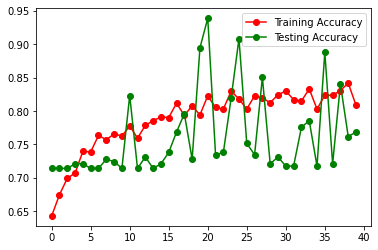

In [ ]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

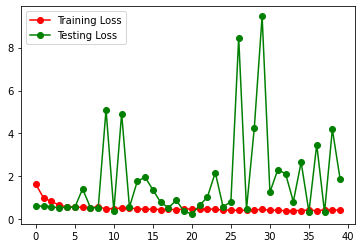

In [ ]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [ ]:
# https://keras.io/api/preprocessing/image/
val_generator = ImageDataGenerator(rescale=1./255.)
val_datagen = val_generator.flow_from_directory(
    test_folder, 
    batch_size=round(len(df_test)/2), # 14/2 = 7
    target_size=(224, 224),
    shuffle=False
)
# for i in range(5):
#     img, label = pic.next()
#     ax[i].imshow(img[0])
#     ax[i].set_xlabel('Caries' if np.argmax(label) == 0 else 'No-Caries',fontsize=12)

Found 294 images belonging to 2 classes.


In [ ]:
Y_true = val_datagen.classes
Y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
Y_pred  = model.predict(val_datagen).round()
Y_pred[0:5]

2/2 [==============================] - 1s 441ms/step


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
Y_true_onehot = tf.keras.utils.to_categorical(Y_true)
Y_true_onehot[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
target_names = ['caries','no-caries']
print(classification_report(Y_true_onehot , Y_pred, target_names = target_names))

              precision    recall  f1-score   support

      caries       0.76      1.00      0.86       210
   no-caries       1.00      0.19      0.32        84

   micro avg       0.77      0.77      0.77       294
   macro avg       0.88      0.60      0.59       294
weighted avg       0.83      0.77      0.71       294
 samples avg       0.77      0.77      0.77       294



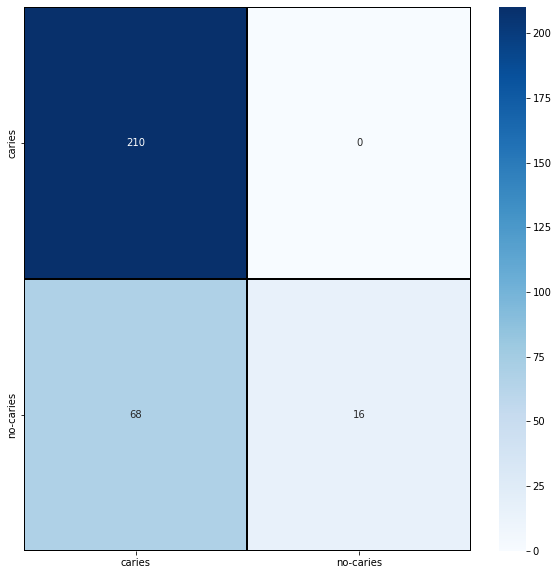

In [ ]:
cm = confusion_matrix(Y_true_onehot.argmax(axis = 1) , Y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = ['caries','no-caries'] , columns = ['caries','no-caries'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,roc_curve, auc
print("roc_auc_score:",roc_auc_score(Y_true_onehot,Y_pred))

roc_auc_score: 0.5952380952380952


In [ ]:
precision_score(Y_true_onehot,Y_pred,average=None)

array([0.75539568, 1.        ])

In [ ]:
recall_score(Y_true_onehot,Y_pred,average=None)

array([1.        , 0.19047619])

In [ ]:
f1_score(Y_true_onehot,Y_pred,average=None)

array([0.86065574, 0.32      ])

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_true_onehot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(Y_true_onehot.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

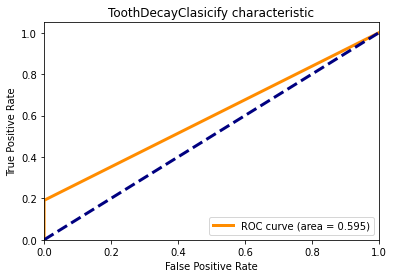

In [ ]:
plt.figure()
lw = 3
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ToothDecayClasicify characteristic')
plt.legend(loc="lower right")
plt.show()

<ipython-input-51-c643d80d3064>:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


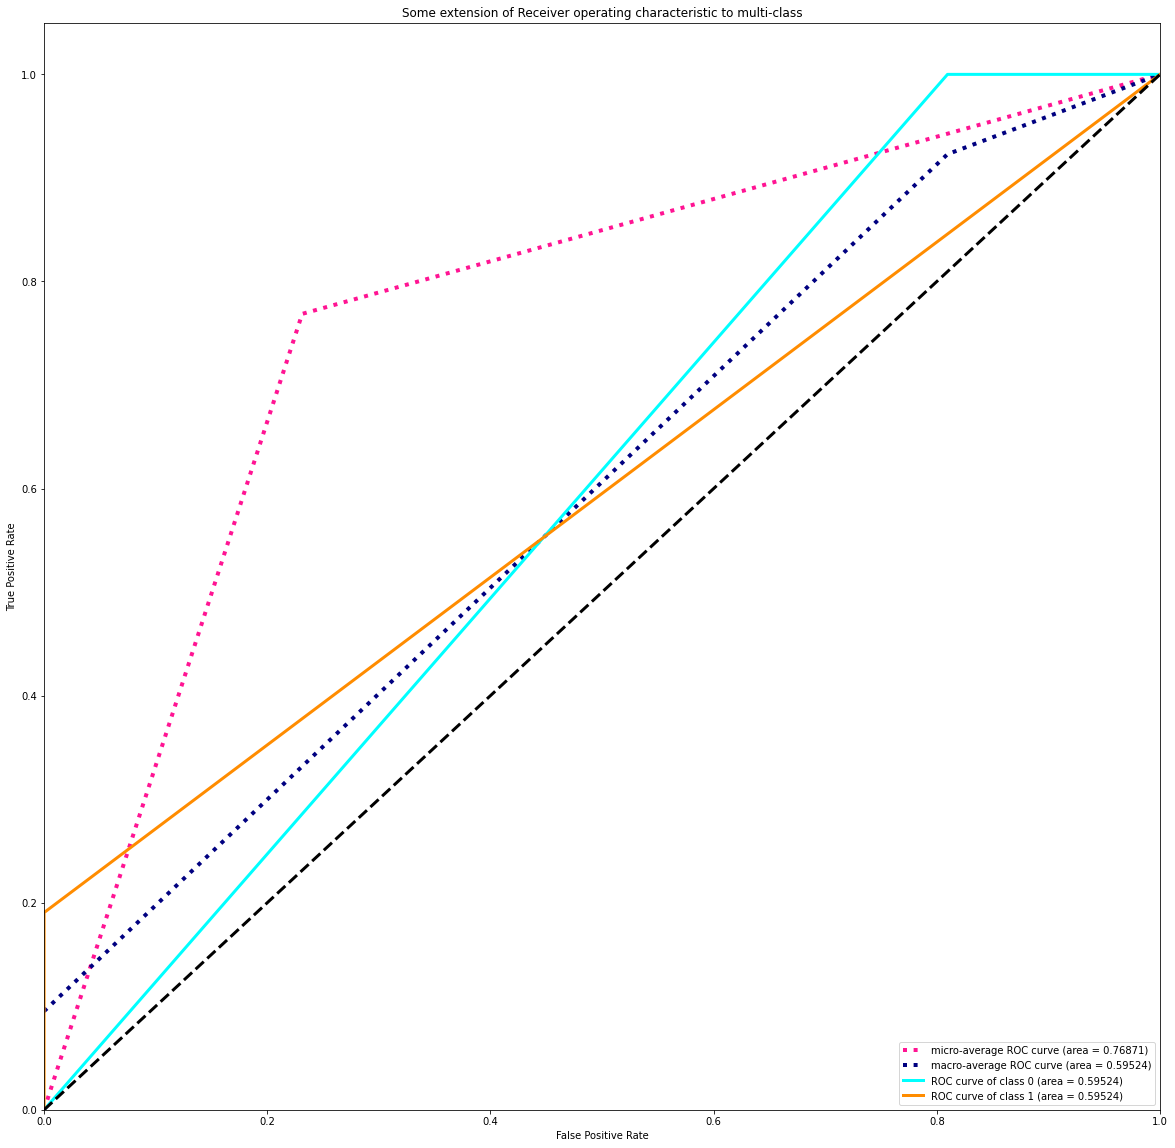

In [ ]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20,20))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.5f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Train By CNN Version 1 Model


In [ ]:
from keras import layers

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 


model.add(Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dense(2, activation="softmax"))
 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)      

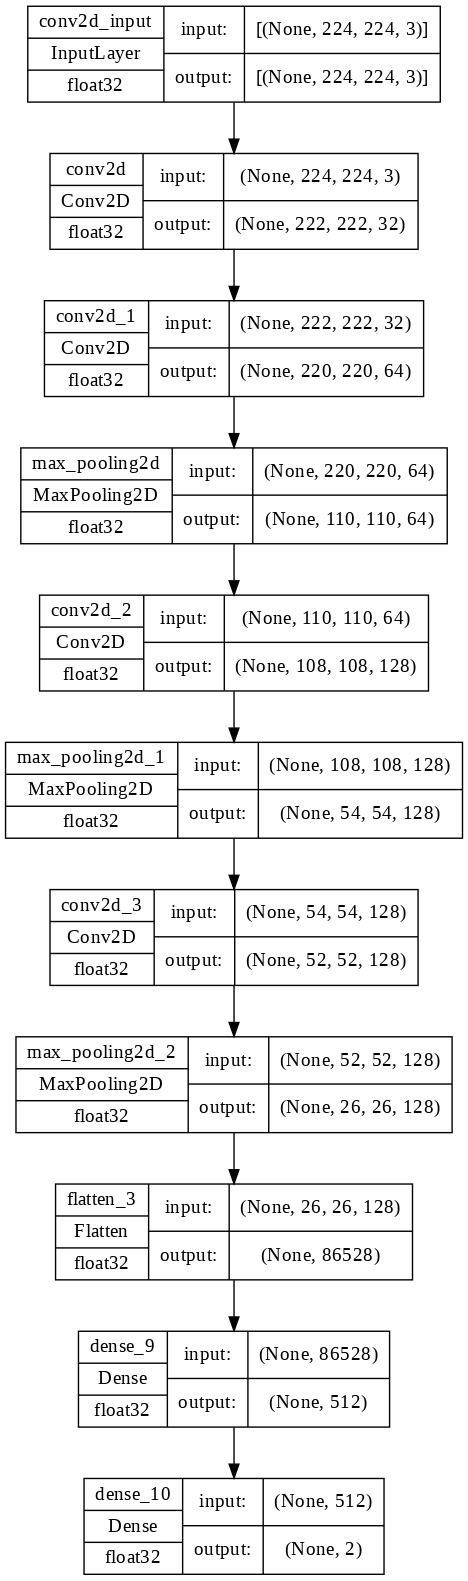

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype = True, show_layer_names = True, rankdir="TB", expand_nested = True, dpi = 100 ,to_file='Layer_V1.png')

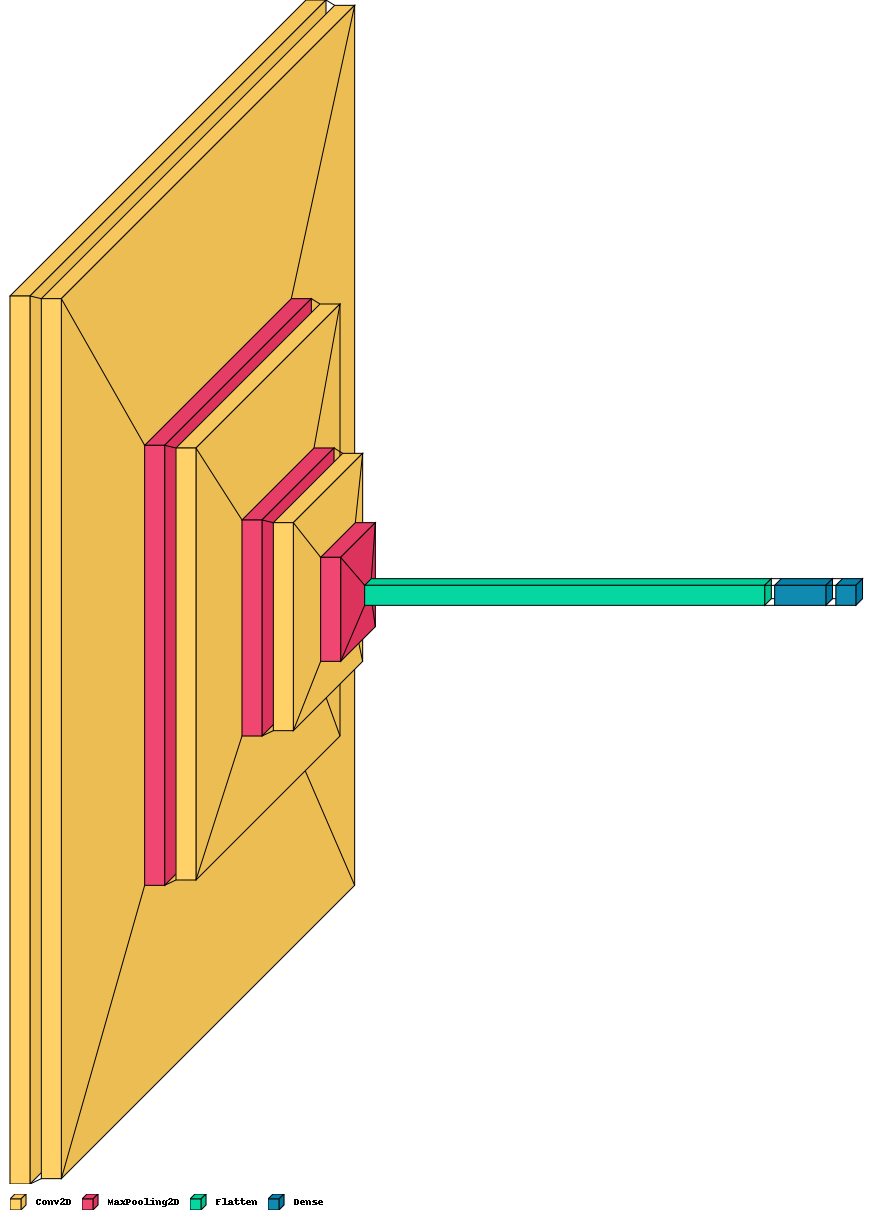

In [ ]:
from PIL import ImageFont
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font,to_file='output_Layer_V1.png')  # font is optional!

In [ ]:
# Functone train
# có thể thay thế Adam = RMSprop = SGD
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
path_checkpoint = 'tmp/Layer_V1_checkpoint'
os.makedirs(path_checkpoint,exist_ok=True)

# https://keras.io/api/callbacks/model_checkpoint/
# https://www.tensorflow.org/tensorboard/scalars_and_keras
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc',
                                                mode='max',
                                                 verbose=1)
callback = [Checkpoint, 
             tf.keras.callbacks.EarlyStopping(patience = 5, monitor= "val_acc",verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir = "logs/{}".format('Toothdecay'))]

In [ ]:
history = model.fit(
    train_datagen,
    validation_data=val_datagen,
    epochs=40,
    callbacks=[
        callback
    ])

Epoch 1/40
127/127 [==============================] - ETA: 0s - loss: 0.5883 - accuracy: 0.7405
Epoch 1: saving model to best_model.h5


127/127 [==============================] - 33s 243ms/step - loss: 0.5883 - accuracy: 0.7405 - val_loss: 0.5851 - val_accuracy: 0.7143
Epoch 2/40
127/127 [==============================] - ETA: 0s - loss: 0.5007 - accuracy: 0.7753
Epoch 2: saving model to best_model.h5


127/127 [==============================] - 25s 198ms/step - loss: 0.5007 - accuracy: 0.7753 - val_loss: 0.4070 - val_accuracy: 0.7449
Epoch 3/40
127/127 [==============================] - ETA: 0s - loss: 0.4867 - accuracy: 0.7840
Epoch 3: saving model to best_model.h5


127/127 [==============================] - 20s 158ms/step - loss: 0.4867 - accuracy: 0.7840 - val_loss: 0.3773 - val_accuracy: 0.8231
Epoch 4/40
127/127 [==============================] - ETA: 0s - loss: 0.4642 - accuracy: 0.7927
Epoch 4: saving model to best_model.h5


127/127 [==============================] - 20s 159ms/step - loss: 0.4642 - accuracy: 0.7927 - val_loss: 0.3349 - val_accuracy: 0.8435
Epoch 5/40
127/127 [==============================] - ETA: 0s - loss: 0.4396 - accuracy: 0.8109
Epoch 5: saving model to best_model.h5


127/127 [==============================] - 21s 168ms/step - loss: 0.4396 - accuracy: 0.8109 - val_loss: 0.2995 - val_accuracy: 0.8673
Epoch 6/40
127/127 [==============================] - ETA: 0s - loss: 0.4382 - accuracy: 0.7975
Epoch 6: saving model to best_model.h5


127/127 [==============================] - 20s 157ms/step - loss: 0.4382 - accuracy: 0.7975 - val_loss: 0.3251 - val_accuracy: 0.8401
Epoch 7/40
127/127 [==============================] - ETA: 0s - loss: 0.4332 - accuracy: 0.8117
Epoch 7: saving model to best_model.h5


127/127 [==============================] - 21s 162ms/step - loss: 0.4332 - accuracy: 0.8117 - val_loss: 0.3359 - val_accuracy: 0.8333
Epoch 8/40
127/127 [==============================] - ETA: 0s - loss: 0.4132 - accuracy: 0.8165
Epoch 8: saving model to best_model.h5


127/127 [==============================] - 20s 160ms/step - loss: 0.4132 - accuracy: 0.8165 - val_loss: 0.4090 - val_accuracy: 0.7687
Epoch 9/40
127/127 [==============================] - ETA: 0s - loss: 0.3998 - accuracy: 0.8283
Epoch 9: saving model to best_model.h5


127/127 [==============================] - 20s 157ms/step - loss: 0.3998 - accuracy: 0.8283 - val_loss: 0.3500 - val_accuracy: 0.8469
Epoch 10/40
127/127 [==============================] - ETA: 0s - loss: 0.3981 - accuracy: 0.8204
Epoch 10: saving model to best_model.h5


127/127 [==============================] - 20s 155ms/step - loss: 0.3981 - accuracy: 0.8204 - val_loss: 0.5761 - val_accuracy: 0.7517
Epoch 11/40
127/127 [==============================] - ETA: 0s - loss: 0.4181 - accuracy: 0.8236
Epoch 11: saving model to best_model.h5


127/127 [==============================] - 20s 157ms/step - loss: 0.4181 - accuracy: 0.8236 - val_loss: 0.3174 - val_accuracy: 0.8946
Epoch 12/40
127/127 [==============================] - ETA: 0s - loss: 0.3931 - accuracy: 0.8180
Epoch 12: saving model to best_model.h5


127/127 [==============================] - 21s 164ms/step - loss: 0.3931 - accuracy: 0.8180 - val_loss: 0.3483 - val_accuracy: 0.8197
Epoch 13/40
127/127 [==============================] - ETA: 0s - loss: 0.3895 - accuracy: 0.8267
Epoch 13: saving model to best_model.h5


127/127 [==============================] - 20s 157ms/step - loss: 0.3895 - accuracy: 0.8267 - val_loss: 0.3402 - val_accuracy: 0.8503
Epoch 14/40
127/127 [==============================] - ETA: 0s - loss: 0.4106 - accuracy: 0.8204
Epoch 14: saving model to best_model.h5


127/127 [==============================] - 20s 158ms/step - loss: 0.4106 - accuracy: 0.8204 - val_loss: 0.3690 - val_accuracy: 0.8265
Epoch 15/40
127/127 [==============================] - ETA: 0s - loss: 0.4167 - accuracy: 0.8267
Epoch 15: saving model to best_model.h5


127/127 [==============================] - 20s 155ms/step - loss: 0.4167 - accuracy: 0.8267 - val_loss: 0.3382 - val_accuracy: 0.8367
Epoch 16/40
127/127 [==============================] - ETA: 0s - loss: 0.3695 - accuracy: 0.8394
Epoch 16: saving model to best_model.h5


127/127 [==============================] - 21s 164ms/step - loss: 0.3695 - accuracy: 0.8394 - val_loss: 0.3008 - val_accuracy: 0.8878
Epoch 17/40
127/127 [==============================] - ETA: 0s - loss: 0.3791 - accuracy: 0.8299
Epoch 17: saving model to best_model.h5


127/127 [==============================] - 20s 156ms/step - loss: 0.3791 - accuracy: 0.8299 - val_loss: 0.3511 - val_accuracy: 0.8299
Epoch 18/40
127/127 [==============================] - ETA: 0s - loss: 0.3732 - accuracy: 0.8370
Epoch 18: saving model to best_model.h5


127/127 [==============================] - 20s 156ms/step - loss: 0.3732 - accuracy: 0.8370 - val_loss: 0.4073 - val_accuracy: 0.7959
Epoch 19/40
127/127 [==============================] - ETA: 0s - loss: 0.3795 - accuracy: 0.8307
Epoch 19: saving model to best_model.h5


127/127 [==============================] - 21s 164ms/step - loss: 0.3795 - accuracy: 0.8307 - val_loss: 0.2972 - val_accuracy: 0.9252
Epoch 20/40
127/127 [==============================] - ETA: 0s - loss: 0.3628 - accuracy: 0.8481
Epoch 20: saving model to best_model.h5


127/127 [==============================] - 20s 154ms/step - loss: 0.3628 - accuracy: 0.8481 - val_loss: 0.3281 - val_accuracy: 0.9184
Epoch 21/40
127/127 [==============================] - ETA: 0s - loss: 0.3763 - accuracy: 0.8347
Epoch 21: saving model to best_model.h5


127/127 [==============================] - 20s 156ms/step - loss: 0.3763 - accuracy: 0.8347 - val_loss: 0.3503 - val_accuracy: 0.8299
Epoch 22/40
127/127 [==============================] - ETA: 0s - loss: 0.3746 - accuracy: 0.8386
Epoch 22: saving model to best_model.h5


127/127 [==============================] - 20s 155ms/step - loss: 0.3746 - accuracy: 0.8386 - val_loss: 0.2600 - val_accuracy: 0.8912
Epoch 23/40
127/127 [==============================] - ETA: 0s - loss: 0.3745 - accuracy: 0.8426
Epoch 23: saving model to best_model.h5


127/127 [==============================] - 21s 163ms/step - loss: 0.3745 - accuracy: 0.8426 - val_loss: 0.4234 - val_accuracy: 0.8639
Epoch 24/40
127/127 [==============================] - ETA: 0s - loss: 0.3662 - accuracy: 0.8275
Epoch 24: saving model to best_model.h5


127/127 [==============================] - 20s 155ms/step - loss: 0.3662 - accuracy: 0.8275 - val_loss: 0.3658 - val_accuracy: 0.9048
Epoch 25/40
127/127 [==============================] - ETA: 0s - loss: 0.3507 - accuracy: 0.8608
Epoch 25: saving model to best_model.h5


127/127 [==============================] - 20s 156ms/step - loss: 0.3507 - accuracy: 0.8608 - val_loss: 0.3835 - val_accuracy: 0.8095
Epoch 26/40
127/127 [==============================] - ETA: 0s - loss: 0.3563 - accuracy: 0.8410
Epoch 26: saving model to best_model.h5


127/127 [==============================] - 21s 164ms/step - loss: 0.3563 - accuracy: 0.8410 - val_loss: 0.6372 - val_accuracy: 0.7823
Epoch 27/40
127/127 [==============================] - ETA: 0s - loss: 0.3661 - accuracy: 0.8434
Epoch 27: saving model to best_model.h5


127/127 [==============================] - 19s 153ms/step - loss: 0.3661 - accuracy: 0.8434 - val_loss: 0.3589 - val_accuracy: 0.9048
Epoch 28/40
127/127 [==============================] - ETA: 0s - loss: 0.3679 - accuracy: 0.8426
Epoch 28: saving model to best_model.h5


127/127 [==============================] - 20s 159ms/step - loss: 0.3679 - accuracy: 0.8426 - val_loss: 0.2892 - val_accuracy: 0.9252
Epoch 29/40
127/127 [==============================] - ETA: 0s - loss: 0.3460 - accuracy: 0.8497
Epoch 29: saving model to best_model.h5


127/127 [==============================] - 19s 152ms/step - loss: 0.3460 - accuracy: 0.8497 - val_loss: 0.3964 - val_accuracy: 0.8810
Epoch 30/40
127/127 [==============================] - ETA: 0s - loss: 0.3475 - accuracy: 0.8592
Epoch 30: saving model to best_model.h5


127/127 [==============================] - 21s 162ms/step - loss: 0.3475 - accuracy: 0.8592 - val_loss: 0.7028 - val_accuracy: 0.7789
Epoch 31/40
127/127 [==============================] - ETA: 0s - loss: 0.3436 - accuracy: 0.8457
Epoch 31: saving model to best_model.h5


127/127 [==============================] - 19s 153ms/step - loss: 0.3436 - accuracy: 0.8457 - val_loss: 0.3179 - val_accuracy: 0.8980
Epoch 32/40
127/127 [==============================] - ETA: 0s - loss: 0.3585 - accuracy: 0.8441
Epoch 32: saving model to best_model.h5


127/127 [==============================] - 20s 154ms/step - loss: 0.3585 - accuracy: 0.8441 - val_loss: 0.4014 - val_accuracy: 0.8776
Epoch 33/40
127/127 [==============================] - ETA: 0s - loss: 0.3463 - accuracy: 0.8568
Epoch 33: saving model to best_model.h5


127/127 [==============================] - 21s 164ms/step - loss: 0.3463 - accuracy: 0.8568 - val_loss: 0.3565 - val_accuracy: 0.8741
Epoch 34/40
127/127 [==============================] - ETA: 0s - loss: 0.3601 - accuracy: 0.8457
Epoch 34: saving model to best_model.h5


127/127 [==============================] - 20s 157ms/step - loss: 0.3601 - accuracy: 0.8457 - val_loss: 0.3961 - val_accuracy: 0.8095
Epoch 35/40
127/127 [==============================] - ETA: 0s - loss: 0.3688 - accuracy: 0.8418
Epoch 35: saving model to best_model.h5


127/127 [==============================] - 20s 154ms/step - loss: 0.3688 - accuracy: 0.8418 - val_loss: 0.2717 - val_accuracy: 0.9082
Epoch 36/40
127/127 [==============================] - ETA: 0s - loss: 0.3291 - accuracy: 0.8647
Epoch 36: saving model to best_model.h5


127/127 [==============================] - 20s 158ms/step - loss: 0.3291 - accuracy: 0.8647 - val_loss: 0.3560 - val_accuracy: 0.8027
Epoch 37/40
127/127 [==============================] - ETA: 0s - loss: 0.3306 - accuracy: 0.8592
Epoch 37: saving model to best_model.h5


127/127 [==============================] - 21s 167ms/step - loss: 0.3306 - accuracy: 0.8592 - val_loss: 0.3448 - val_accuracy: 0.9048
Epoch 38/40
127/127 [==============================] - ETA: 0s - loss: 0.3664 - accuracy: 0.8528
Epoch 38: saving model to best_model.h5


127/127 [==============================] - 20s 156ms/step - loss: 0.3664 - accuracy: 0.8528 - val_loss: 0.3647 - val_accuracy: 0.9014
Epoch 39/40
127/127 [==============================] - ETA: 0s - loss: 0.3362 - accuracy: 0.8647
Epoch 39: saving model to best_model.h5


127/127 [==============================] - 21s 164ms/step - loss: 0.3362 - accuracy: 0.8647 - val_loss: 0.2357 - val_accuracy: 0.9184
Epoch 40/40
127/127 [==============================] - ETA: 0s - loss: 0.3718 - accuracy: 0.8600
Epoch 40: saving model to best_model.h5


127/127 [==============================] - 20s 155ms/step - loss: 0.3718 - accuracy: 0.8600 - val_loss: 0.2505 - val_accuracy: 0.9286


# Plot Accuracy and Loss Layer_V1

In [ ]:
# Load the TensorBoard notebook extension.
# %load_ext tensorboard
# %tensorboard --logdir logs/Toothdecay

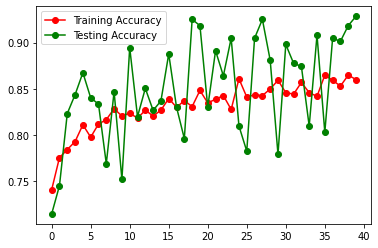

In [ ]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

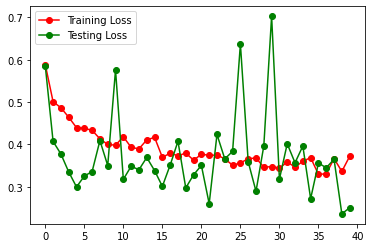

In [ ]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [ ]:
# https://keras.io/api/preprocessing/image/
val_generator = ImageDataGenerator(rescale=1./255.)
val_datagen = val_generator.flow_from_directory(
    test_folder, 
    batch_size=round(len(df_test)/2), # 14/2 = 7
    target_size=(224, 224),
    shuffle=False
)
# for i in range(5):
#     img, label = pic.next()
#     ax[i].imshow(img[0])
#     ax[i].set_xlabel('Caries' if np.argmax(label) == 0 else 'No-Caries',fontsize=12)

Found 294 images belonging to 2 classes.


In [ ]:
Y_true = val_datagen.classes
Y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
Y_pred  = model.predict(val_datagen).round()
Y_pred[0:5]

2/2 [==============================] - 1s 311ms/step


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
Y_true_onehot = tf.keras.utils.to_categorical(Y_true)
Y_true_onehot[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
target_names = ['caries','no-caries']
print(classification_report(Y_true_onehot , Y_pred, target_names = target_names))

              precision    recall  f1-score   support

      caries       0.94      0.96      0.95       210
   no-caries       0.90      0.85      0.87        84

   micro avg       0.93      0.93      0.93       294
   macro avg       0.92      0.90      0.91       294
weighted avg       0.93      0.93      0.93       294
 samples avg       0.93      0.93      0.93       294



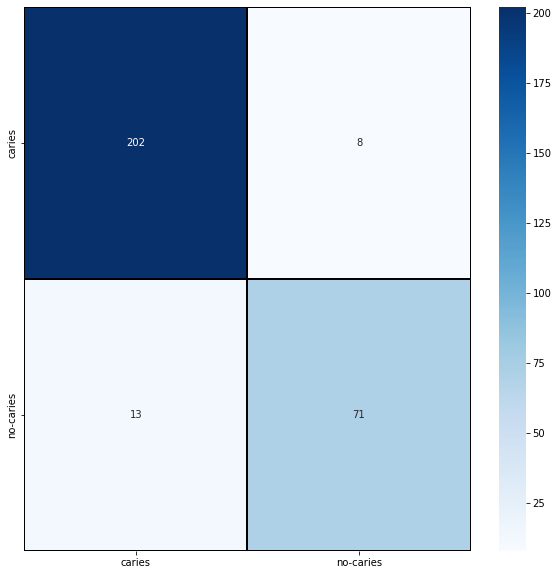

In [ ]:
cm = confusion_matrix(Y_true_onehot.argmax(axis = 1) , Y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = ['caries','no-caries'] , columns = ['caries','no-caries'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,roc_curve, auc
print("roc_auc_score:",roc_auc_score(Y_true_onehot,Y_pred))

roc_auc_score: 0.9035714285714286


In [ ]:
precision_score(Y_true_onehot,Y_pred,average=None)

array([0.93953488, 0.89873418])

In [ ]:
recall_score(Y_true_onehot,Y_pred,average=None)

array([0.96190476, 0.8452381 ])

In [ ]:
f1_score(Y_true_onehot,Y_pred,average=None)

array([0.95058824, 0.87116564])

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_true_onehot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(Y_true_onehot.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

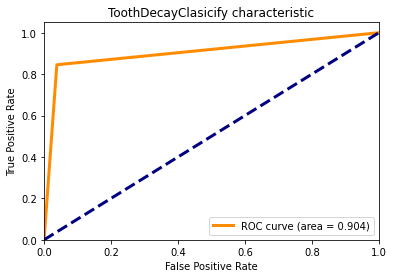

In [ ]:
plt.figure()
lw = 3
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ToothDecayClasicify characteristic')
plt.legend(loc="lower right")
plt.show()

<ipython-input-109-c643d80d3064>:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


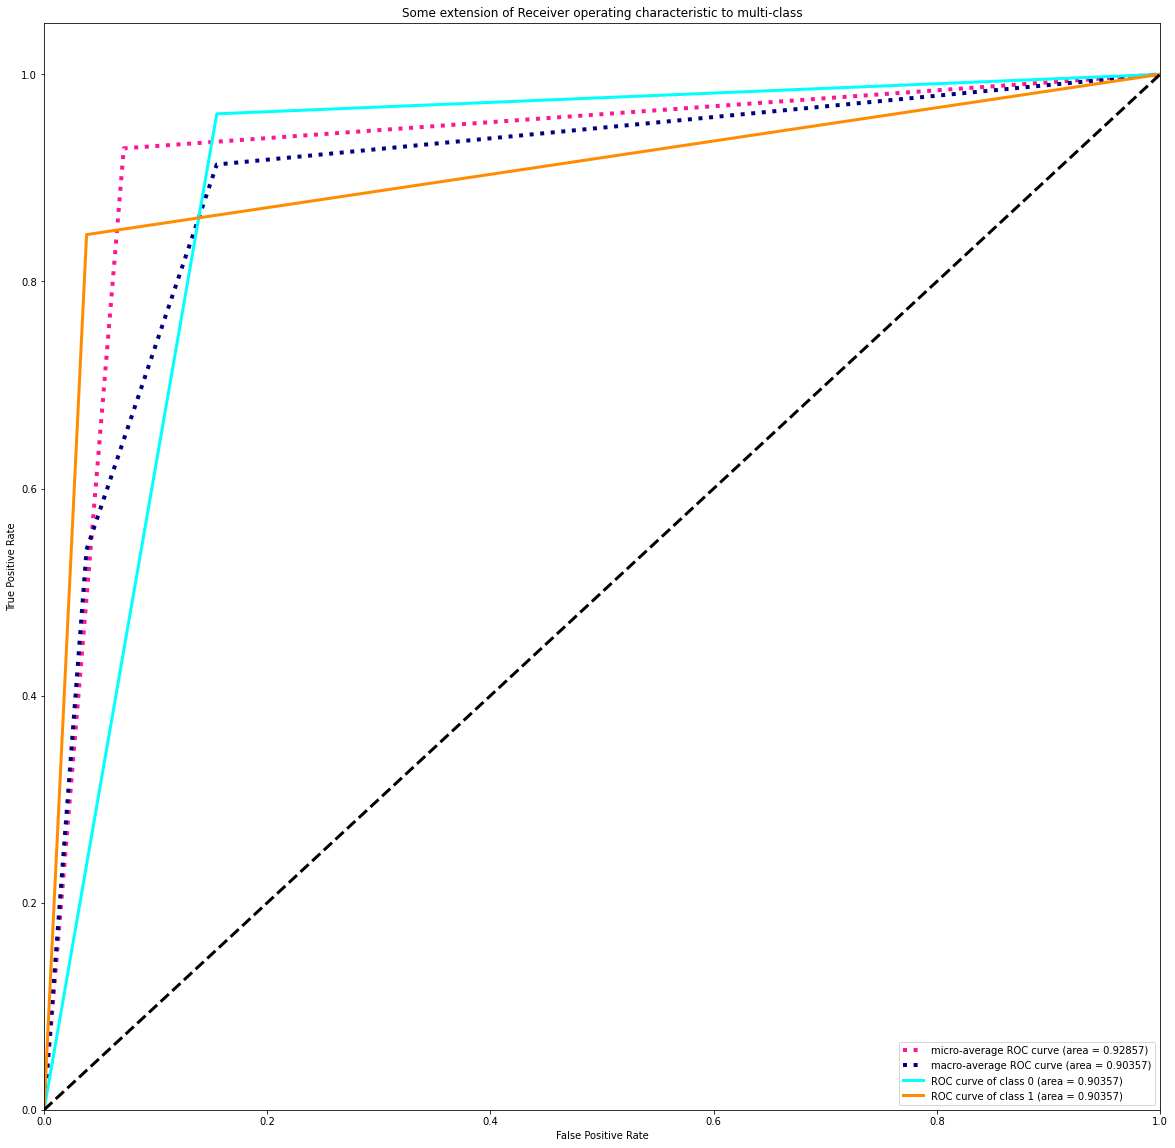

In [ ]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20,20))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.5f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Train By CNN Version 2 Model


In [ ]:
from keras import layers

In [ ]:
model = Sequential()
model.add(layers.Conv2D(128, (4, 4), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 


model.add(Flatten()) 
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 221, 221, 128)     6272      
                                                                 
 conv2d_17 (Conv2D)          (None, 219, 219, 256)     295168    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 109, 109, 256)    0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 107, 107, 128)     295040    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 53, 53, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 51, 51, 64)       

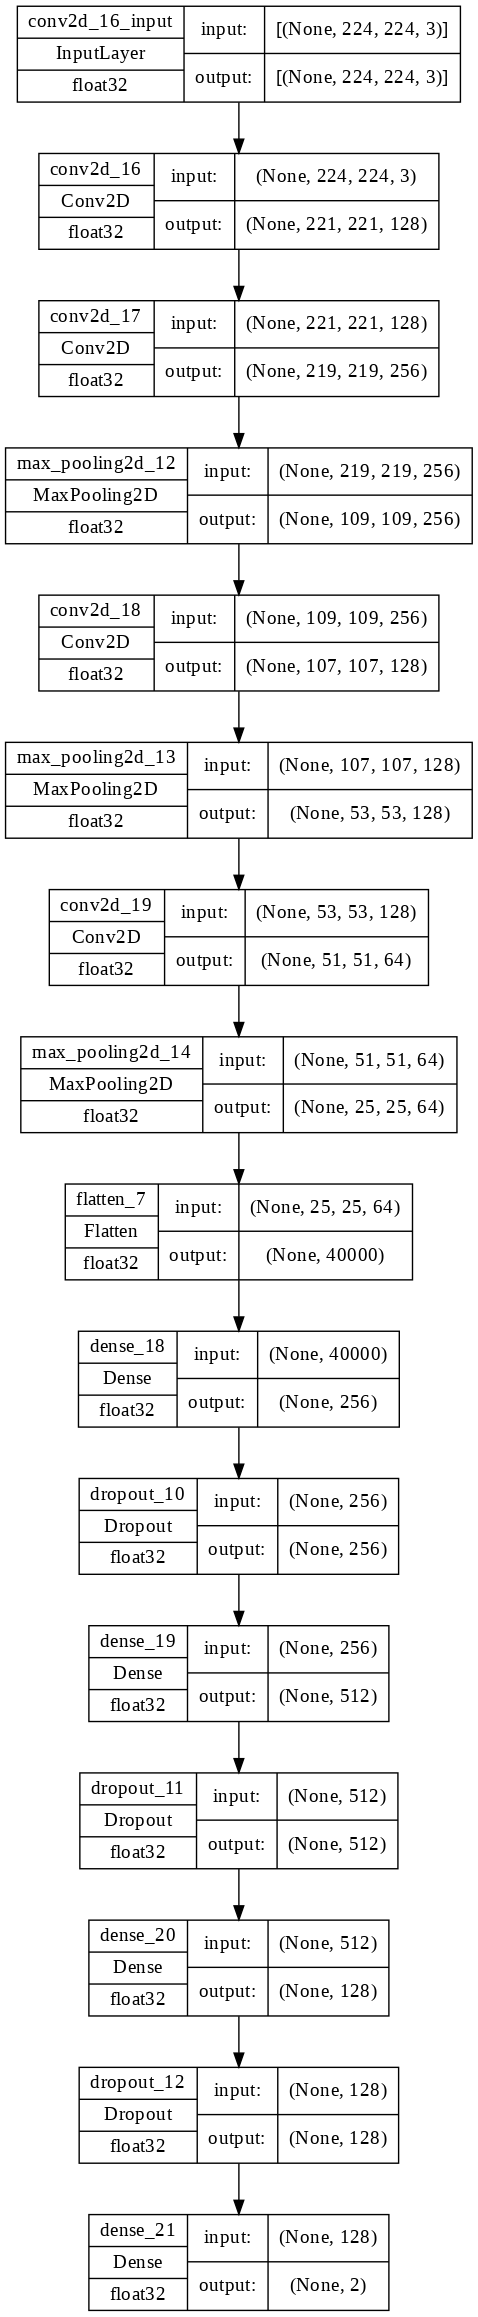

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype = True, show_layer_names = True,  expand_nested = True, dpi = 100 ,to_file='Layer_V2.png')

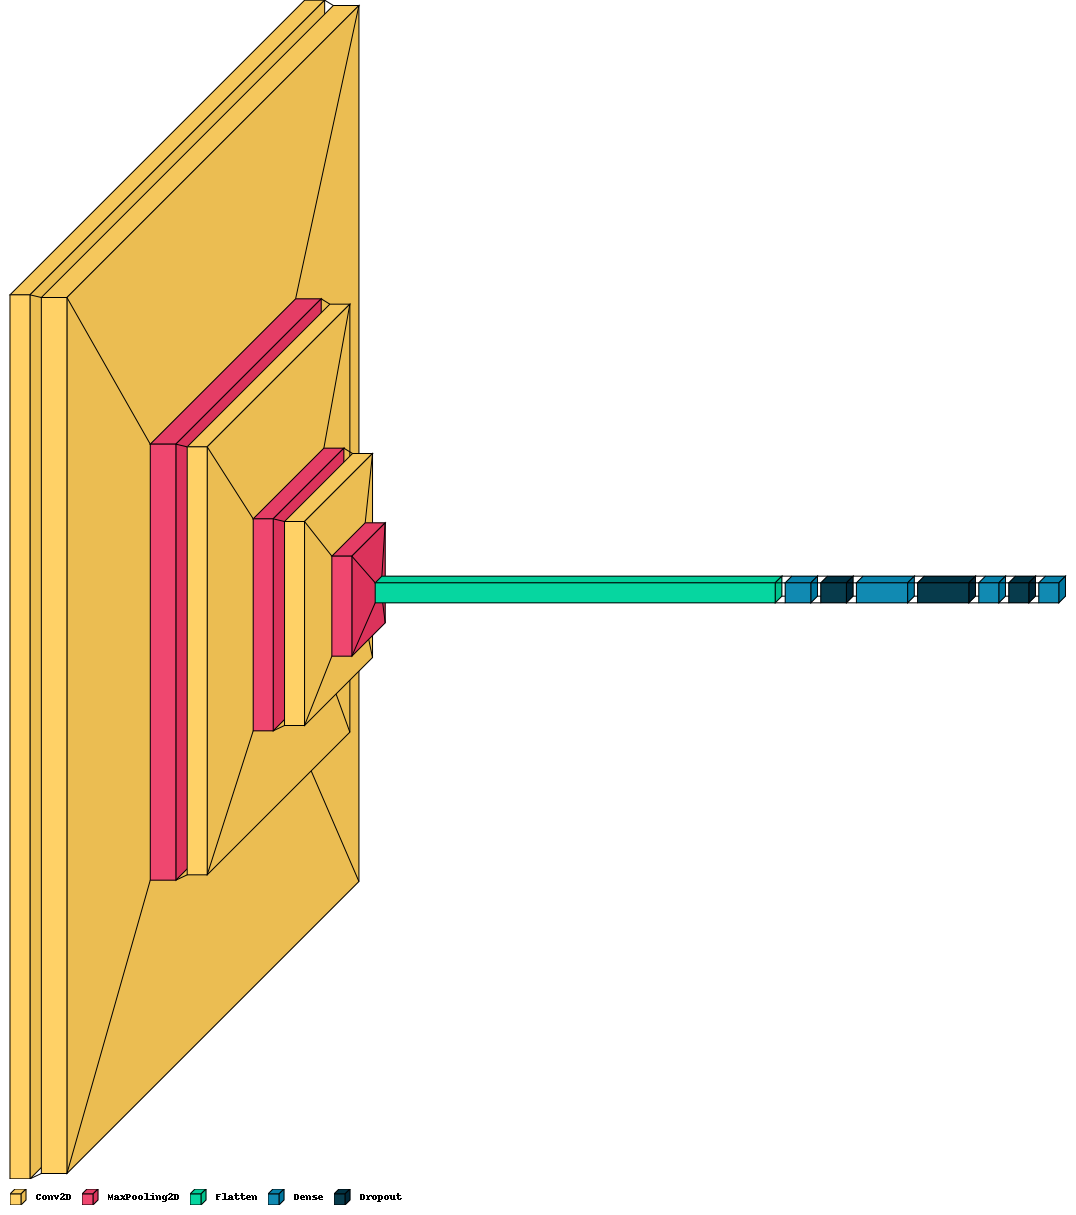

In [ ]:
from PIL import ImageFont
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font,to_file='output_Layer_V2.png')  # font is optional!

In [ ]:
# Functone train
# có thể thay thế Adam = RMSprop = SGD
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
path_checkpoint = 'tmp/Layer_V2_checkpoint'
os.makedirs(path_checkpoint,exist_ok=True)

# https://keras.io/api/callbacks/model_checkpoint/
# https://www.tensorflow.org/tensorboard/scalars_and_keras
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_Layer_V2.h5',
                                                  monitor='val_acc',
                                                mode='max',
                                                 verbose=1)
callback = [Checkpoint, 
             tf.keras.callbacks.EarlyStopping(patience = 5, monitor= "val_acc",verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir = "logs/{}".format('Toothdecay'))]

In [ ]:
history = model.fit(
    train_datagen,
    validation_data=val_datagen,
    epochs=30,
    callbacks=[
        callback
    ])

Epoch 1/30
127/127 [==============================] - ETA: 0s - loss: 0.6332 - accuracy: 0.7294
Epoch 1: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 72s 559ms/step - loss: 0.6332 - accuracy: 0.7294 - val_loss: 0.5849 - val_accuracy: 0.7143
Epoch 2/30
127/127 [==============================] - ETA: 0s - loss: 0.5896 - accuracy: 0.7476
Epoch 2: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 235ms/step - loss: 0.5896 - accuracy: 0.7476 - val_loss: 0.4650 - val_accuracy: 0.7143
Epoch 3/30
127/127 [==============================] - ETA: 0s - loss: 0.5368 - accuracy: 0.7476
Epoch 3: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 232ms/step - loss: 0.5368 - accuracy: 0.7476 - val_loss: 0.4398 - val_accuracy: 0.7143
Epoch 4/30
127/127 [==============================] - ETA: 0s - loss: 0.5100 - accuracy: 0.7500
Epoch 4: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 234ms/step - loss: 0.5100 - accuracy: 0.7500 - val_loss: 0.4761 - val_accuracy: 0.7143
Epoch 5/30
127/127 [==============================] - ETA: 0s - loss: 0.4748 - accuracy: 0.7627
Epoch 5: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 237ms/step - loss: 0.4748 - accuracy: 0.7627 - val_loss: 0.3461 - val_accuracy: 0.8197
Epoch 6/30
127/127 [==============================] - ETA: 0s - loss: 0.4882 - accuracy: 0.7769
Epoch 6: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 235ms/step - loss: 0.4882 - accuracy: 0.7769 - val_loss: 0.3743 - val_accuracy: 0.7755
Epoch 7/30
127/127 [==============================] - ETA: 0s - loss: 0.4612 - accuracy: 0.8070
Epoch 7: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 232ms/step - loss: 0.4612 - accuracy: 0.8070 - val_loss: 0.4149 - val_accuracy: 0.7721
Epoch 8/30
127/127 [==============================] - ETA: 0s - loss: 0.4517 - accuracy: 0.8070
Epoch 8: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 232ms/step - loss: 0.4517 - accuracy: 0.8070 - val_loss: 0.4835 - val_accuracy: 0.7347
Epoch 9/30
127/127 [==============================] - ETA: 0s - loss: 0.4423 - accuracy: 0.8101
Epoch 9: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 230ms/step - loss: 0.4423 - accuracy: 0.8101 - val_loss: 0.7122 - val_accuracy: 0.7619
Epoch 10/30
127/127 [==============================] - ETA: 0s - loss: 0.4837 - accuracy: 0.8165
Epoch 10: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 235ms/step - loss: 0.4837 - accuracy: 0.8165 - val_loss: 0.4514 - val_accuracy: 0.7619
Epoch 11/30
127/127 [==============================] - ETA: 0s - loss: 0.4318 - accuracy: 0.8070
Epoch 11: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.4318 - accuracy: 0.8070 - val_loss: 0.3389 - val_accuracy: 0.8503
Epoch 12/30
127/127 [==============================] - ETA: 0s - loss: 0.4208 - accuracy: 0.8188
Epoch 12: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 231ms/step - loss: 0.4208 - accuracy: 0.8188 - val_loss: 0.3661 - val_accuracy: 0.8537
Epoch 13/30
127/127 [==============================] - ETA: 0s - loss: 0.4176 - accuracy: 0.8204
Epoch 13: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 230ms/step - loss: 0.4176 - accuracy: 0.8204 - val_loss: 0.8536 - val_accuracy: 0.7177
Epoch 14/30
127/127 [==============================] - ETA: 0s - loss: 0.4240 - accuracy: 0.8275
Epoch 14: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 236ms/step - loss: 0.4240 - accuracy: 0.8275 - val_loss: 0.3529 - val_accuracy: 0.8265
Epoch 15/30
127/127 [==============================] - ETA: 0s - loss: 0.4118 - accuracy: 0.8157
Epoch 15: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 227ms/step - loss: 0.4118 - accuracy: 0.8157 - val_loss: 0.3492 - val_accuracy: 0.8605
Epoch 16/30
127/127 [==============================] - ETA: 0s - loss: 0.3917 - accuracy: 0.8291
Epoch 16: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.3917 - accuracy: 0.8291 - val_loss: 0.4476 - val_accuracy: 0.7755
Epoch 17/30
127/127 [==============================] - ETA: 0s - loss: 0.4146 - accuracy: 0.8085
Epoch 17: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 233ms/step - loss: 0.4146 - accuracy: 0.8085 - val_loss: 0.5370 - val_accuracy: 0.8231
Epoch 18/30
127/127 [==============================] - ETA: 0s - loss: 0.4360 - accuracy: 0.8291
Epoch 18: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.4360 - accuracy: 0.8291 - val_loss: 0.3776 - val_accuracy: 0.8265
Epoch 19/30
127/127 [==============================] - ETA: 0s - loss: 0.3811 - accuracy: 0.8370
Epoch 19: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 234ms/step - loss: 0.3811 - accuracy: 0.8370 - val_loss: 0.3361 - val_accuracy: 0.9150
Epoch 20/30
127/127 [==============================] - ETA: 0s - loss: 0.4146 - accuracy: 0.8354
Epoch 20: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.4146 - accuracy: 0.8354 - val_loss: 0.8164 - val_accuracy: 0.7313
Epoch 21/30
127/127 [==============================] - ETA: 0s - loss: 0.4127 - accuracy: 0.8394
Epoch 21: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 234ms/step - loss: 0.4127 - accuracy: 0.8394 - val_loss: 0.3219 - val_accuracy: 0.8912
Epoch 22/30
127/127 [==============================] - ETA: 0s - loss: 0.4086 - accuracy: 0.8315
Epoch 22: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 226ms/step - loss: 0.4086 - accuracy: 0.8315 - val_loss: 0.2950 - val_accuracy: 0.8980
Epoch 23/30
127/127 [==============================] - ETA: 0s - loss: 0.4004 - accuracy: 0.8267
Epoch 23: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 231ms/step - loss: 0.4004 - accuracy: 0.8267 - val_loss: 0.2788 - val_accuracy: 0.9048
Epoch 24/30
127/127 [==============================] - ETA: 0s - loss: 0.3928 - accuracy: 0.8362
Epoch 24: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.3928 - accuracy: 0.8362 - val_loss: 0.3936 - val_accuracy: 0.8163
Epoch 25/30
127/127 [==============================] - ETA: 0s - loss: 0.4442 - accuracy: 0.8394
Epoch 25: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 228ms/step - loss: 0.4442 - accuracy: 0.8394 - val_loss: 0.9367 - val_accuracy: 0.7347
Epoch 26/30
127/127 [==============================] - ETA: 0s - loss: 0.4031 - accuracy: 0.8402
Epoch 26: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 231ms/step - loss: 0.4031 - accuracy: 0.8402 - val_loss: 0.5051 - val_accuracy: 0.7993
Epoch 27/30
127/127 [==============================] - ETA: 0s - loss: 0.4141 - accuracy: 0.8362
Epoch 27: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 31s 243ms/step - loss: 0.4141 - accuracy: 0.8362 - val_loss: 0.3191 - val_accuracy: 0.8741
Epoch 28/30
127/127 [==============================] - ETA: 0s - loss: 0.4368 - accuracy: 0.8267
Epoch 28: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 235ms/step - loss: 0.4368 - accuracy: 0.8267 - val_loss: 0.4899 - val_accuracy: 0.7789
Epoch 29/30
127/127 [==============================] - ETA: 0s - loss: 0.3963 - accuracy: 0.8339
Epoch 29: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 29s 229ms/step - loss: 0.3963 - accuracy: 0.8339 - val_loss: 0.3407 - val_accuracy: 0.9218
Epoch 30/30
127/127 [==============================] - ETA: 0s - loss: 0.4138 - accuracy: 0.8378
Epoch 30: saving model to best_model_Layer_V2.h5


127/127 [==============================] - 30s 232ms/step - loss: 0.4138 - accuracy: 0.8378 - val_loss: 0.4230 - val_accuracy: 0.8673


# Plot Accuracy and Loss Layer_V2

> Indented block



In [ ]:
# Load the TensorBoard notebook extension.
# %load_ext tensorboard
# %tensorboard --logdir logs/Toothdecay

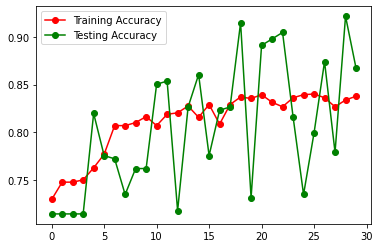

In [ ]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

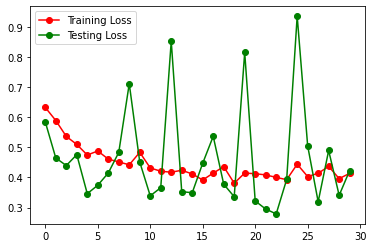

In [ ]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [ ]:
# https://keras.io/api/preprocessing/image/
val_generator = ImageDataGenerator(rescale=1./255.)
val_datagen = val_generator.flow_from_directory(
    test_folder, 
    batch_size=round(len(df_test)/2), # 14/2 = 7
    target_size=(224, 224),
    shuffle=False
)
# for i in range(5):
#     img, label = pic.next()
#     ax[i].imshow(img[0])
#     ax[i].set_xlabel('Caries' if np.argmax(label) == 0 else 'No-Caries',fontsize=12)

Found 294 images belonging to 2 classes.


In [ ]:
Y_true = val_datagen.classes
Y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
Y_pred  = model.predict(val_datagen).round()
Y_pred[0:5]

2/2 [==============================] - 1s 1s/step


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
Y_true_onehot = tf.keras.utils.to_categorical(Y_true)
Y_true_onehot[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
target_names = ['caries','no-caries']
print(classification_report(Y_true_onehot , Y_pred, target_names = target_names))

              precision    recall  f1-score   support

      caries       0.86      0.97      0.91       210
   no-caries       0.88      0.62      0.73        84

   micro avg       0.87      0.87      0.87       294
   macro avg       0.87      0.79      0.82       294
weighted avg       0.87      0.87      0.86       294
 samples avg       0.87      0.87      0.87       294



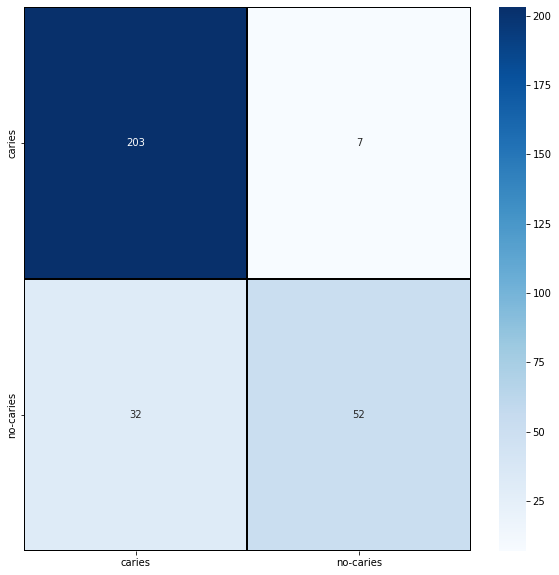

In [ ]:
cm = confusion_matrix(Y_true_onehot.argmax(axis = 1) , Y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = ['caries','no-caries'] , columns = ['caries','no-caries'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,roc_curve, auc
print("roc_auc_score:",roc_auc_score(Y_true_onehot,Y_pred))

roc_auc_score: 0.7928571428571429


In [ ]:
precision_score(Y_true_onehot,Y_pred,average=None)

array([0.86382979, 0.88135593])

In [ ]:
recall_score(Y_true_onehot,Y_pred,average=None)

array([0.96666667, 0.61904762])

In [ ]:
f1_score(Y_true_onehot,Y_pred,average=None)

array([0.91235955, 0.72727273])

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_true_onehot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(Y_true_onehot.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

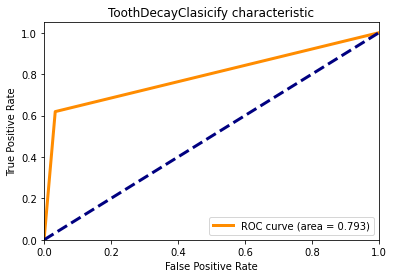

In [ ]:
plt.figure()
lw = 3
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ToothDecayClasicify characteristic')
plt.legend(loc="lower right")
plt.show()

<ipython-input-154-c643d80d3064>:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


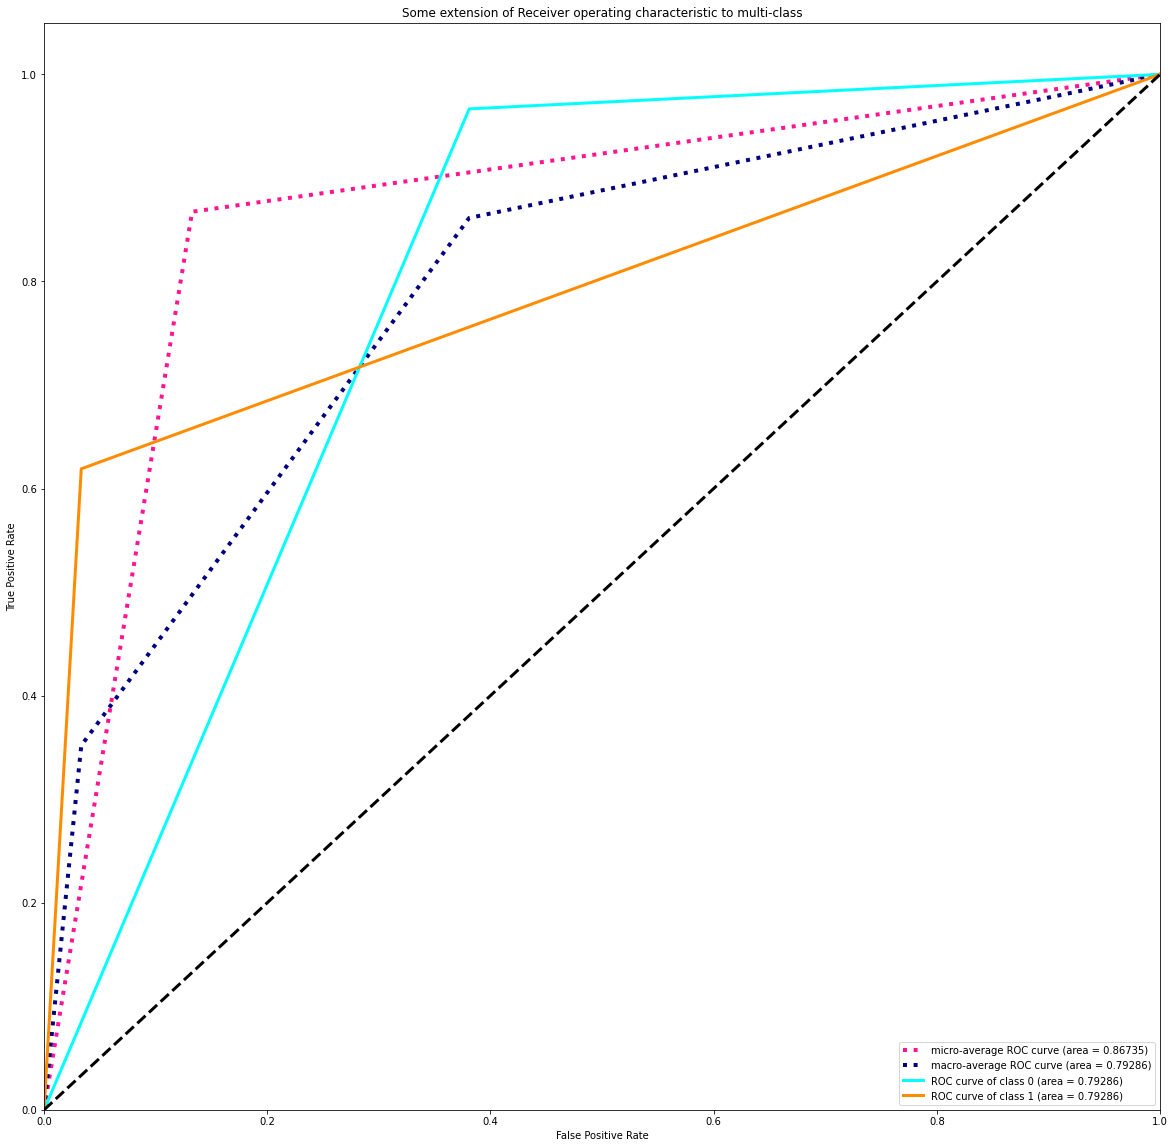

In [ ]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20,20))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.5f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#!zip -r /content/file.zip /content/File_V23/

  adding: content/File_V23/ (stored 0%)
  adding: content/File_V23/tmp/ (stored 0%)
  adding: content/File_V23/tmp/Layer_V2_checkpoint/ (stored 0%)
  adding: content/File_V23/tmp/ResNet50_checkpoint/ (stored 0%)
  adding: content/File_V23/tmp/DenseNet121_checkpoint/ (stored 0%)
  adding: content/File_V23/tmp/Layer_V1_checkpoint/ (stored 0%)
  adding: content/File_V23/tmp/VGG16_checkpoint/ (stored 0%)
  adding: content/File_V23/Layer_V2.png (deflated 16%)
  adding: content/File_V23/Layer_V1.png (deflated 16%)
  adding: content/File_V23/output_Layer_V1.png (deflated 11%)
  adding: content/File_V23/ResNet50.png (deflated 16%)
  adding: content/File_V23/output_ResNet50.png (deflated 4%)
  adding: content/File_V23/.ipynb_checkpoints/ (stored 0%)
  adding: content/File_V23/output_VGG16.png (deflated 3%)
  adding: content/File_V23/DenseNet121.png (deflated 17%)
  adding: content/File_V23/logs/ (stored 0%)
  adding: content/File_V23/logs/Toothdecay/ (stored 0%)
  adding: content/File_V23/logs/

In [167]:
classes = ['carries','no-caries']

In [168]:
pip install fastapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 11.5 MB/s eta 0:00:00


In [169]:

# Define a function to decode the prediction
def decode_prediction(p):
  print(p)
  if p[0] > p[1]:
    return 'Caries'
  else:
    return 'no-Caries'

In [170]:

# Define a Preproccecing
def preprocessing(image):
  
    # Resize the image to match the model's input size
    image = cv2.resize(image, (224, 224))

    # Convert the image to a NumPy array and scale the pixel values
    image_array = image.astype(np.float32) / 255.0
    return image_array


#  The Best Model is VGG16 "loss: 0.3107 - accuracy: 0.8710 " : 
#Export The Best Model To use As Api  

In [205]:

# Save the model
tf.saved_model.save(modelVGG16, "drive/MyDrive/Best_trained_model")


In [202]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
